## Setup

In [1]:
%run setup.ipynb

In [4]:
df_h12 = phase1_selection.hstats_windowed
df_h12.head(10)

AOM       BFM       BFS       CMS  GAS       GNS  \
chrom start  stop                                                       
2L    1      20000   NaN       NaN       NaN       NaN  NaN       NaN   
      20001  40000   NaN       NaN       NaN       NaN  NaN       NaN   
      40001  60000   NaN       NaN       NaN       NaN  NaN       NaN   
      60001  80000   NaN       NaN       NaN       NaN  NaN       NaN   
      80001  100000  NaN       NaN       NaN       NaN  NaN       NaN   
      100001 120000  NaN       NaN       NaN       NaN  NaN       NaN   
      120001 140000  NaN       NaN       NaN       NaN  NaN       NaN   
      140001 160000  NaN       NaN       NaN       NaN  NaN       NaN   
      160001 180000  NaN  0.431632  0.769395  0.093488  NaN  0.817898   
      180001 200000  NaN  0.481516  0.769242  0.106883  NaN  0.846514   

                          GWA       UGS  
chrom start  stop                        
2L    1      20000        NaN       NaN  
      20001  40000        NaN       NaN  
      40001  60000        NaN       NaN  
      60001  80000        NaN       NaN  
      80001  100000       NaN       NaN  
      100001 120000       NaN       NaN  
      120001 140000       NaN       NaN  
      140001 160000       NaN       NaN  
      160001 180000  0.049386  0.706240  
      180001 200000  0.049386  0.706146

## Check signals

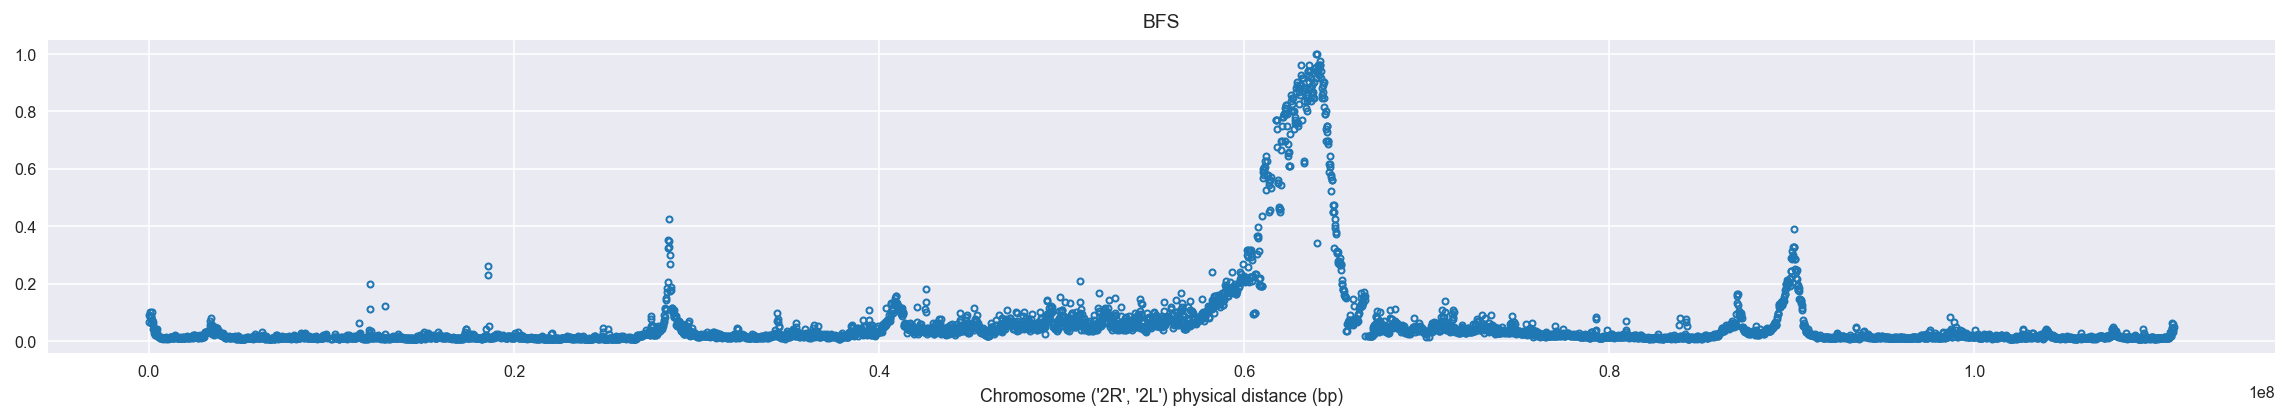

In [5]:
rockies.plot_signal(df_h12, col='BFS', chrom=('2R', '2L'), recmap=recmap);

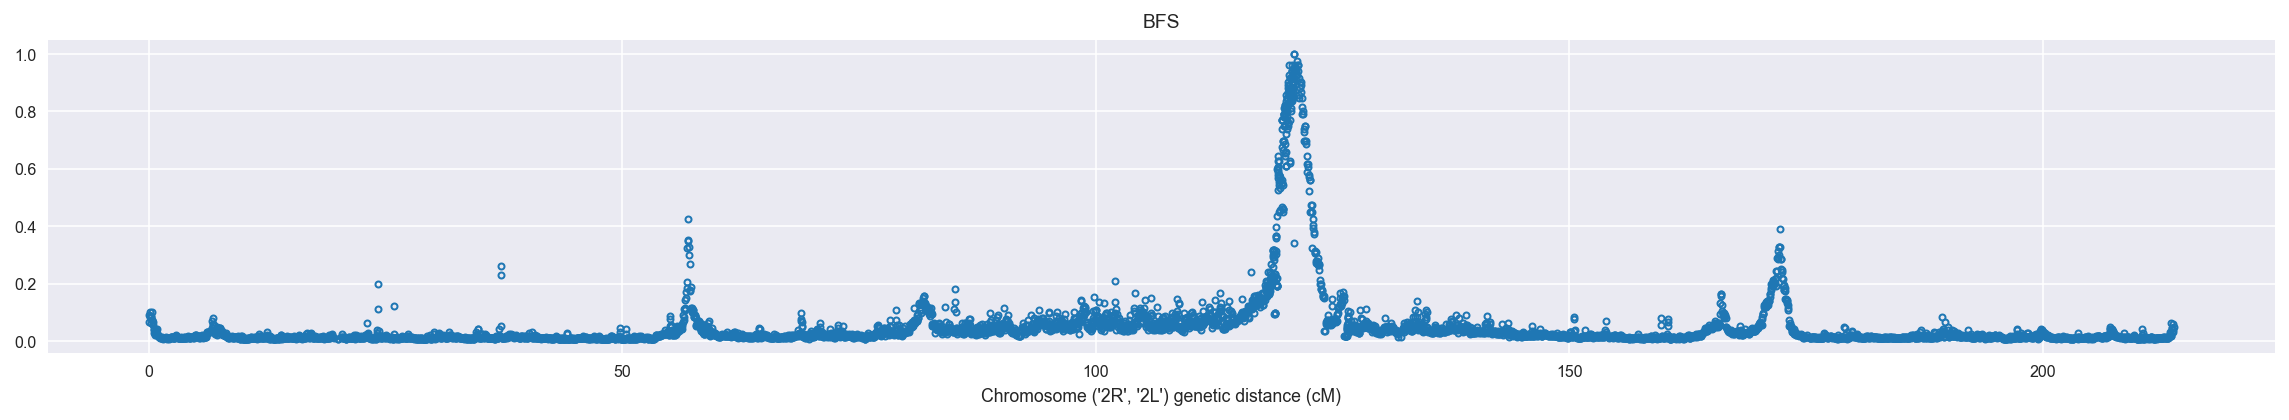

In [6]:
rockies.plot_signal(df_h12, col='BFS', chrom=('2R', '2L'), recmap=recmap, distance='genetic');

## Check peak fitters

In [7]:
starts, stops, gpos, signal = rockies.extract_signal(df_h12, col='BFS', chrom=('2R', '2L'), recmap=recmap)
missing = np.isnan(signal)

In [8]:
3e6 * 2e-6

6.0

In [9]:
# This fits each flank independently and returns delta AIC as minimum of the two 
# flanks - better at excluding edge effects.
pairexp_fitter = rockies.PairExponentialPeakFitter(
    amplitude=lmfit.Parameter(value=0.5, vary=True, min=0),
    decay=lmfit.Parameter(value=0.2, vary=True, min=0.1),
    c=lmfit.Parameter(value=.04, vary=True, min=0, max=0.2),
    cap=lmfit.Parameter(value=1, vary=False)
)

### Vgsc

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 78
    # data points      = 297
    # variables        = 3
    chi-square         = 3.262
    reduced chi-square = 0.011
    Akaike info crit   = -1333.861
    Bayesian info crit = -1322.780
[[Variables]]
    amplitude:   1.24827327 +/- 0.034400 (2.76%) (init= 0.5)
    decay:       1.50738758 +/- 0.102500 (6.80%) (init= 0.2)
    c:           0.02857540 +/- 0.021630 (75.70%) (init= 0.04)
    cap:         1 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(decay, c)                  = -0.867 
    C(amplitude, decay)          = -0.480 

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 56
    # data points      = 163
    # variables        = 3
    chi-square         = 0.437
    reduced chi-square = 0.003
    Akaike info crit   = -959.136
    Bayesian info crit = -949.855
[[Variables]]
    amplitude:   1.48160430 +/- 0.045410 (3.06%) (init= 0.5)
    decay:       1.341

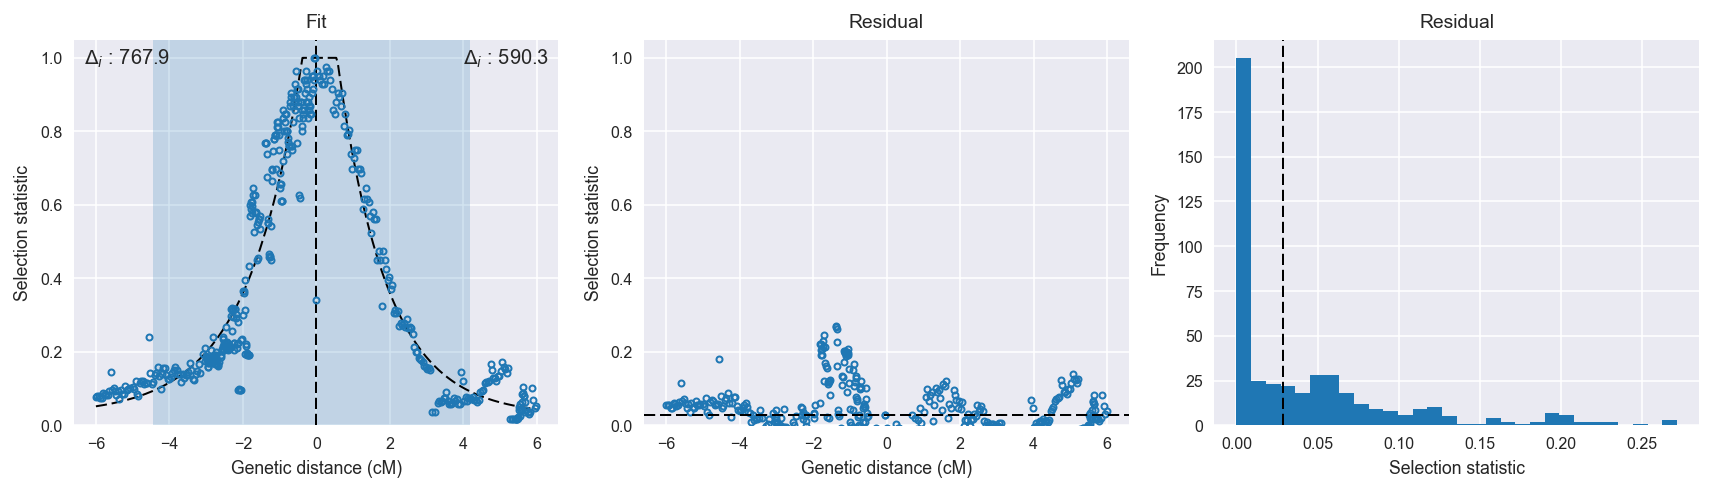

In [10]:
x, y, center, flank = gpos[~missing], signal[~missing], 121, 6
fit = pairexp_fitter.fit(x, y, center, flank)
rockies.plot_peak(fit)
print(fit.peak_result[0].fit_report())
print(fit.peak_result[1].fit_report())
print(fit.null_result[0].fit_report())
print(fit.null_result[1].fit_report())

### Cyp6p

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 23
    # data points      = 150
    # variables        = 3
    chi-square         = 0.038
    reduced chi-square = 0.000
    Akaike info crit   = -1235.725
    Bayesian info crit = -1226.693
[[Variables]]
    amplitude:   0.39058926 +/- 0.010529 (2.70%) (init= 0.5)
    decay:       0.28708964 +/- 0.012383 (4.31%) (init= 0.2)
    c:           0.01937928 +/- 0.001462 (7.54%) (init= 0.04)
    cap:         1 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, decay)          = -0.609 
    C(decay, c)                  = -0.326 

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 43
    # data points      = 149
    # variables        = 3
    chi-square         = 0.027
    reduced chi-square = 0.000
    Akaike info crit   = -1275.307
    Bayesian info crit = -1266.295
[[Variables]]
    amplitude:   0.30093218 +/- 0.010142 (3.37%) (init= 0.5)
    decay:       0.36

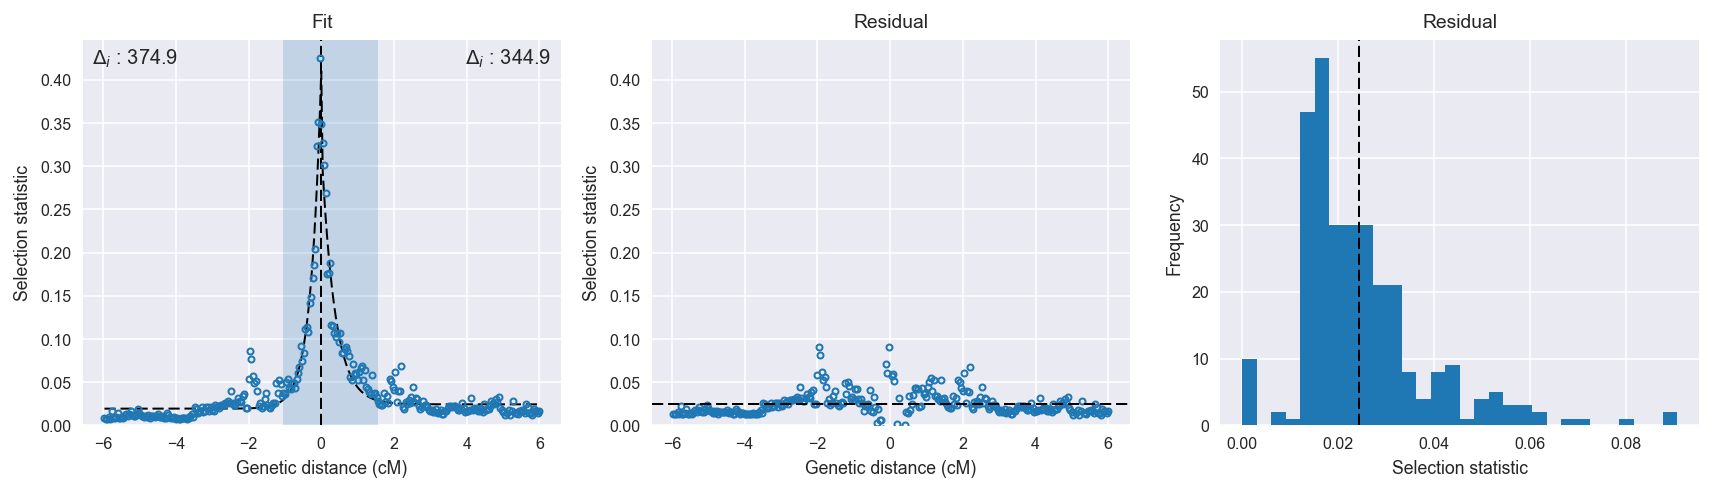

In [11]:
x, y, center, flank = gpos[~missing], signal[~missing], 57, 6
fit = pairexp_fitter.fit(x, y, center, flank)
rockies.plot_peak(fit)
print(fit.peak_result[0].fit_report())
print(fit.peak_result[1].fit_report())
print(fit.null_result[0].fit_report())
print(fit.null_result[1].fit_report())

## Check peak-finding 

### BFS, chr2

In [12]:
starts, stops, gpos, signal = rockies.extract_signal(
    df_h12, col='BFS', chrom=('2R', '2L'), recmap=recmap
)

In [13]:
#loc = slice(2800, 3600)
loc = slice(None)
peaks = iter(rockies.find_peaks(starts[loc], stops[loc], gpos[loc], signal[loc], 
                                flank=6, fitter=pairexp_fitter, 
                                min_delta_aic=50, extend_delta_aic=0, debug=True))

scan progress 0 0.04
scan progress 100 4.04
scan progress 200 8.04
scan progress 300 12.04
scan progress 400 16.04
scan progress 500 20.04
scan progress 600 24.04
scan progress 700 28.04
scan progress 800 32.04
scan progress 900 36.04
scan progress 1000 40.04
scan progress 1100 44.04
scan progress 1200 48.04
scan progress 1300 52.04
scan progress 1400 56.04
scan progress 1500 60.04
scan progress 1600 64.04
scan progress 1700 68.04
scan progress 1800 72.04
scan progress 1900 76.04
scan progress 2000 80.04
scan progress 2100 84.04
scan progress 2200 88.04
scan progress 2300 92.04
scan progress 2400 96.04
scan progress 2500 100.04
scan progress 2600 104.04
scan progress 2700 108.04
scan progress 2800 112.04
scan progress 2900 116.04
scan progress 3000 118.5906878
scan progress 3100 119.7817508
scan progress 3200 121.021487
scan progress 3300 125.021487
scan progress 3400 128.0276074
scan progress 3500 132.0276074
scan progress 3600 136.0276074
scan progress 3700 140.0276074
scan progress 

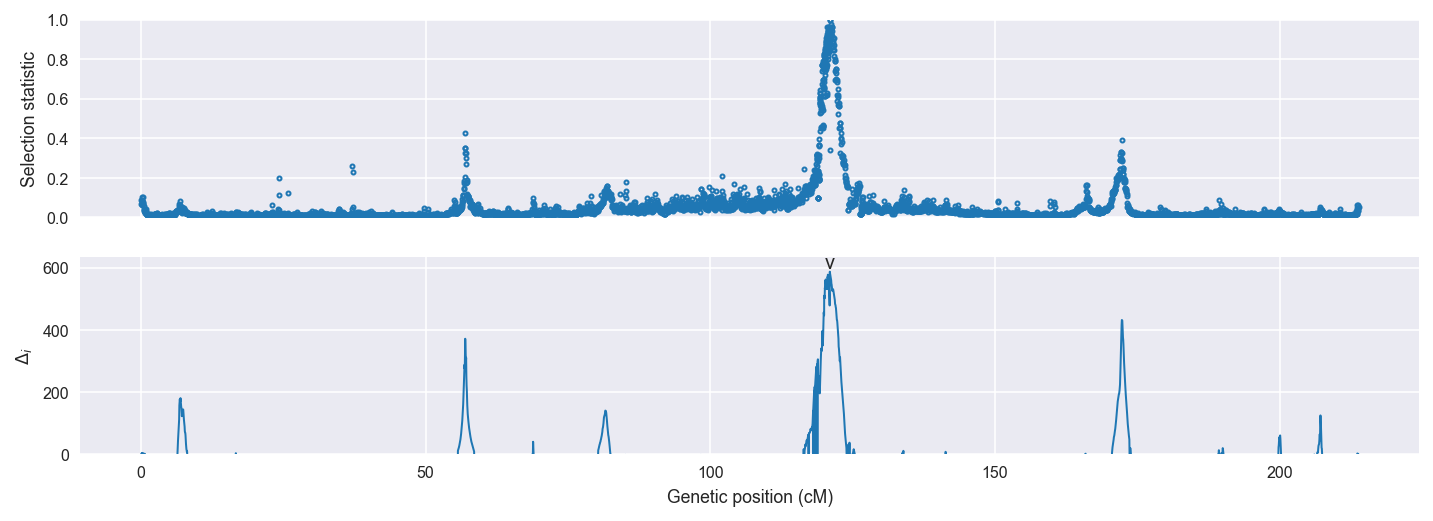

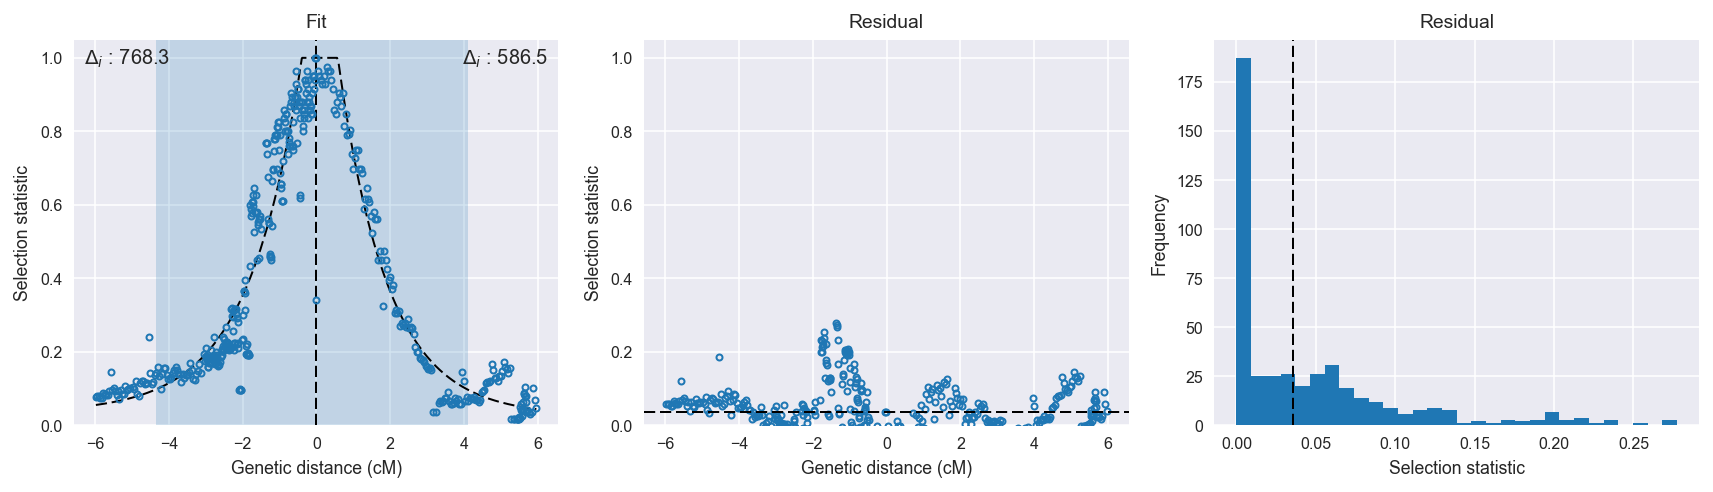

find extent of region under selection
find flanking region


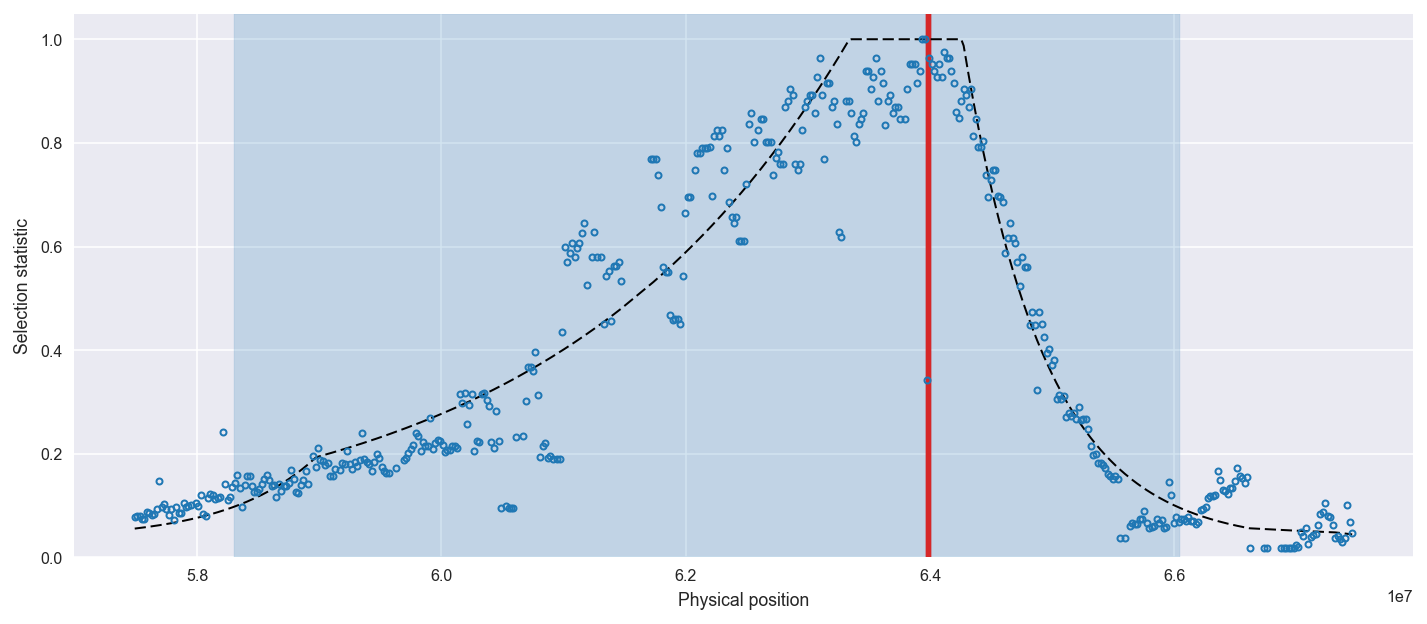

((63965106, 64005105), array([2420001, 2460000]))

In [14]:
peak = next(peaks)
peak[3:5], np.array(peak[3:5]) - len(genome['2R'])

rescan 2724 3524
scan progress 2800 112.04
scan progress 2900 116.04
scan progress 3000 118.5906878
scan progress 3100 119.7817508
scan progress 3200 121.021487
scan progress 3300 125.021487
scan progress 3400 128.0276074
scan progress 3500 132.0276074
********************************************************************************
Iteration 1
Peak index: 4506
Delta AIC: 431.443894274
Window: 90105106 90125105
********************************************************************************


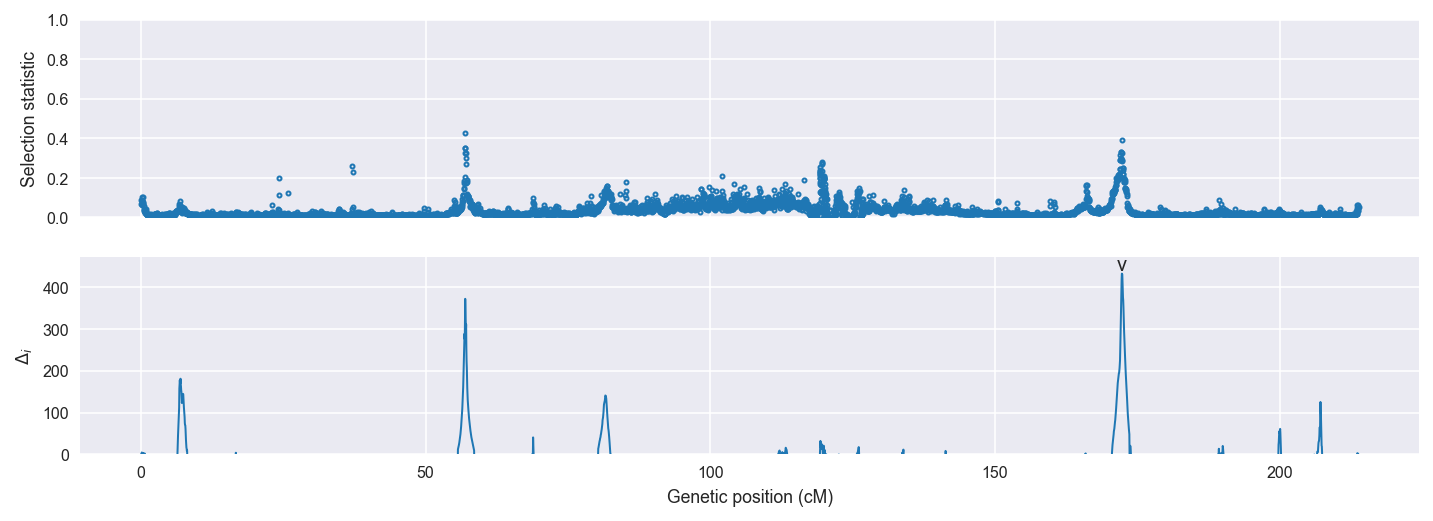

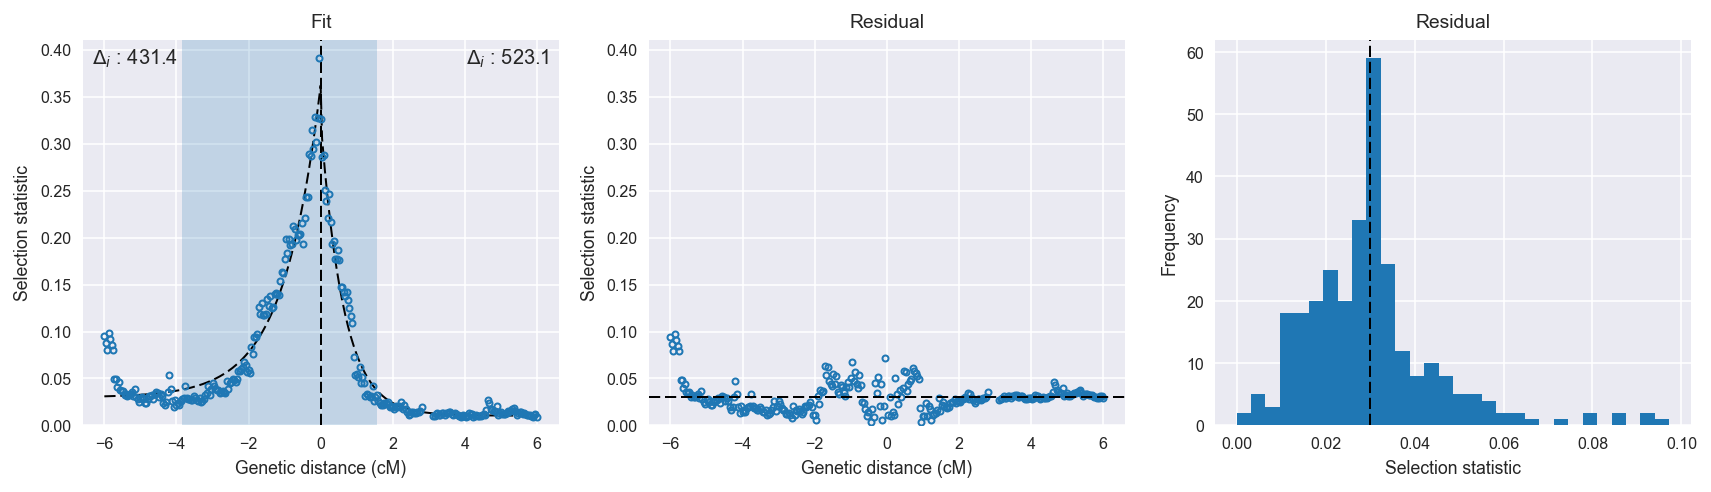

find extent of region under selection
find flanking region


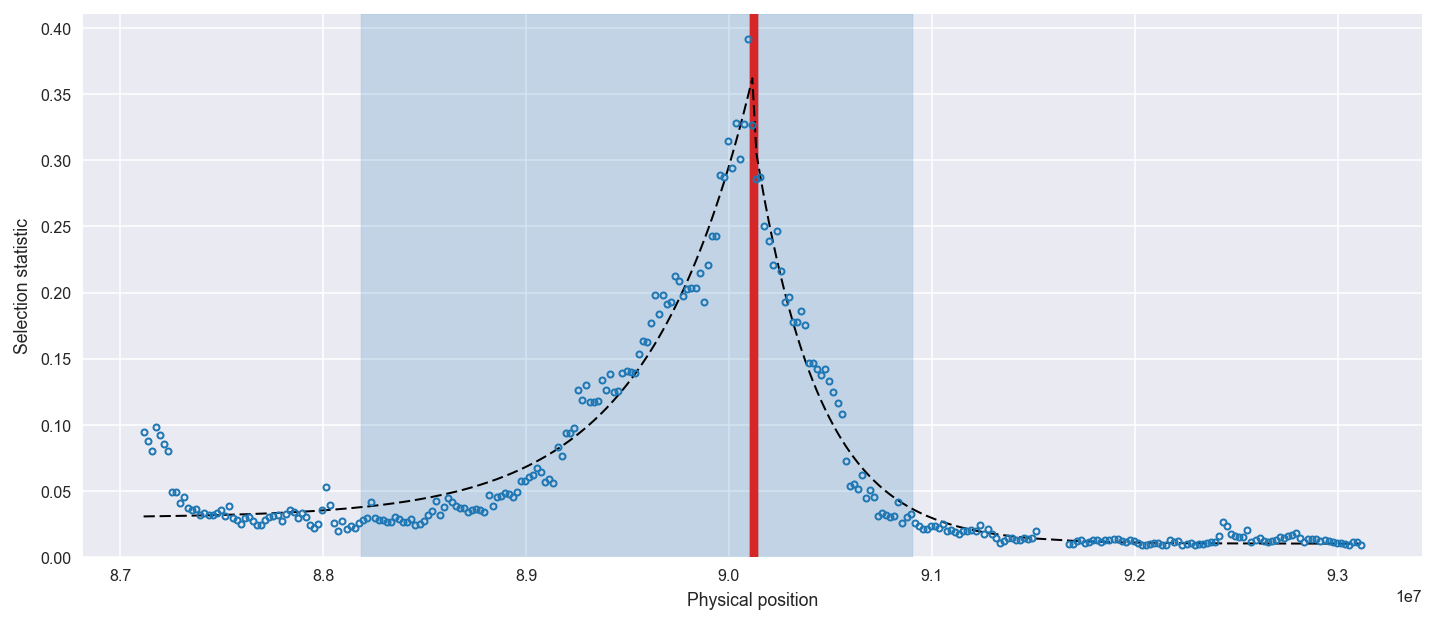

((90105106, 90145105), array([28560001, 28600000]))

In [15]:
peak = next(peaks)
peak[3:5], np.array(peak[3:5]) - len(genome['2R'])

rescan 4206 4807
scan progress 4300 164.0276074
scan progress 4400 168.0276074
scan progress 4500 172.0276074
scan progress 4600 176.0276074
scan progress 4700 180.0276074
scan progress 4800 184.0276074
********************************************************************************
Iteration 2
Peak index: 1423
Delta AIC: 371.302474212
Window: 28460001 28480000
********************************************************************************


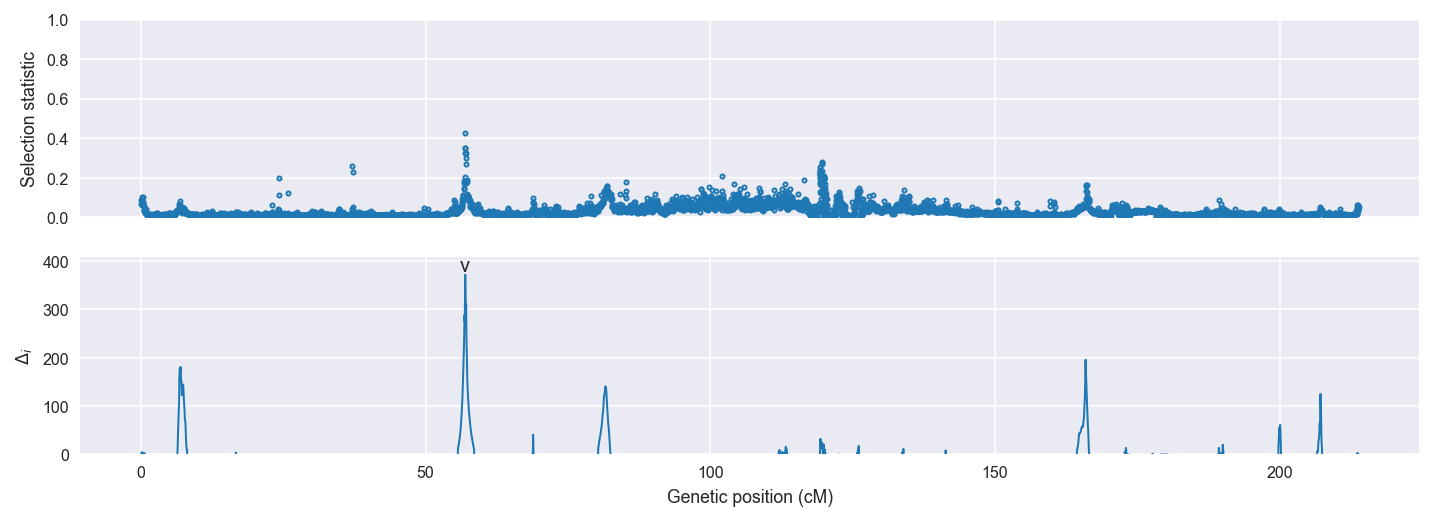

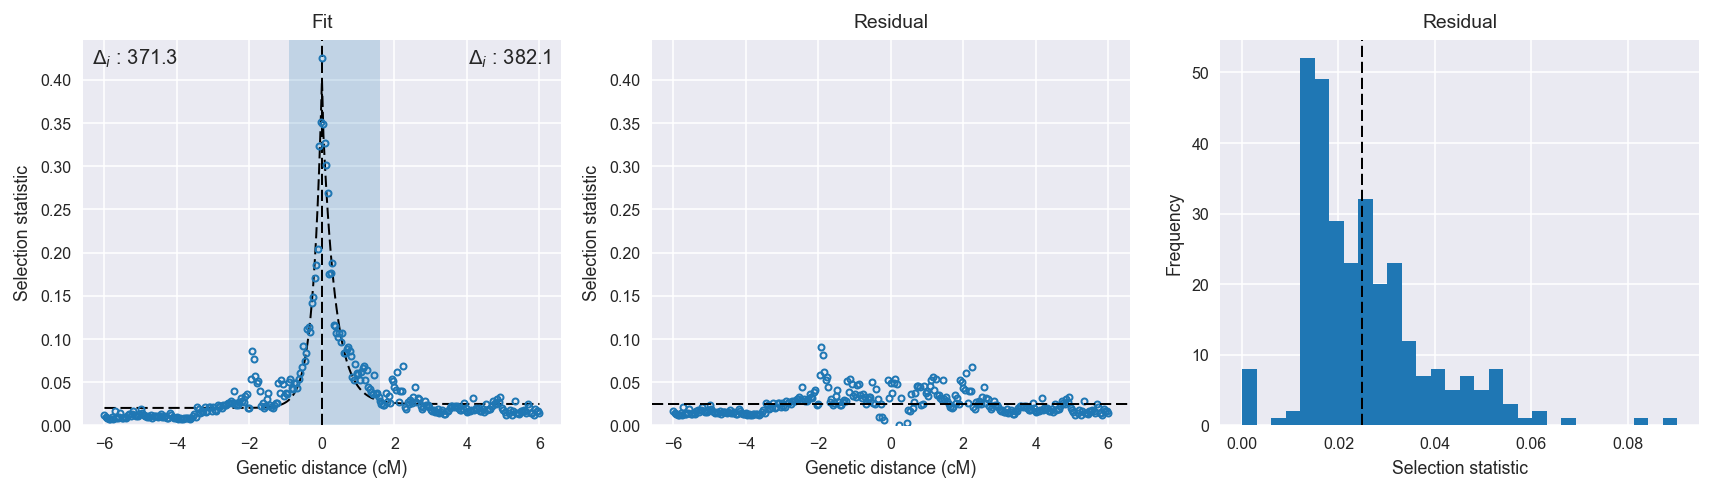

find extent of region under selection
find flanking region


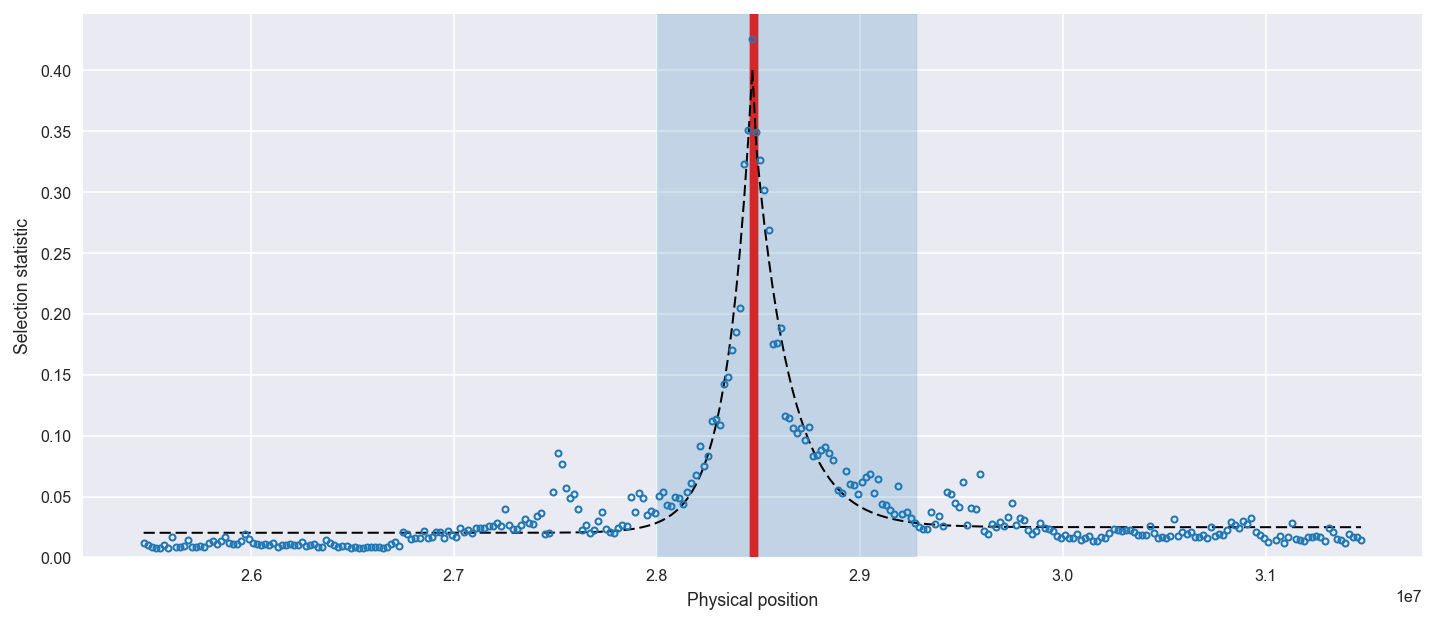

((28460001, 28500000), array([-33085104, -33045105]))

In [16]:
peak = next(peaks)
peak[3:5], np.array(peak[3:5]) - len(genome['2R'])

rescan 1123 1723
scan progress 1200 48.04
scan progress 1300 52.04
scan progress 1400 56.04
scan progress 1500 60.04
scan progress 1600 64.04
scan progress 1700 68.04
********************************************************************************
Iteration 3
Peak index: 4347
Delta AIC: 195.566920154
Window: 86925106 86945105
********************************************************************************


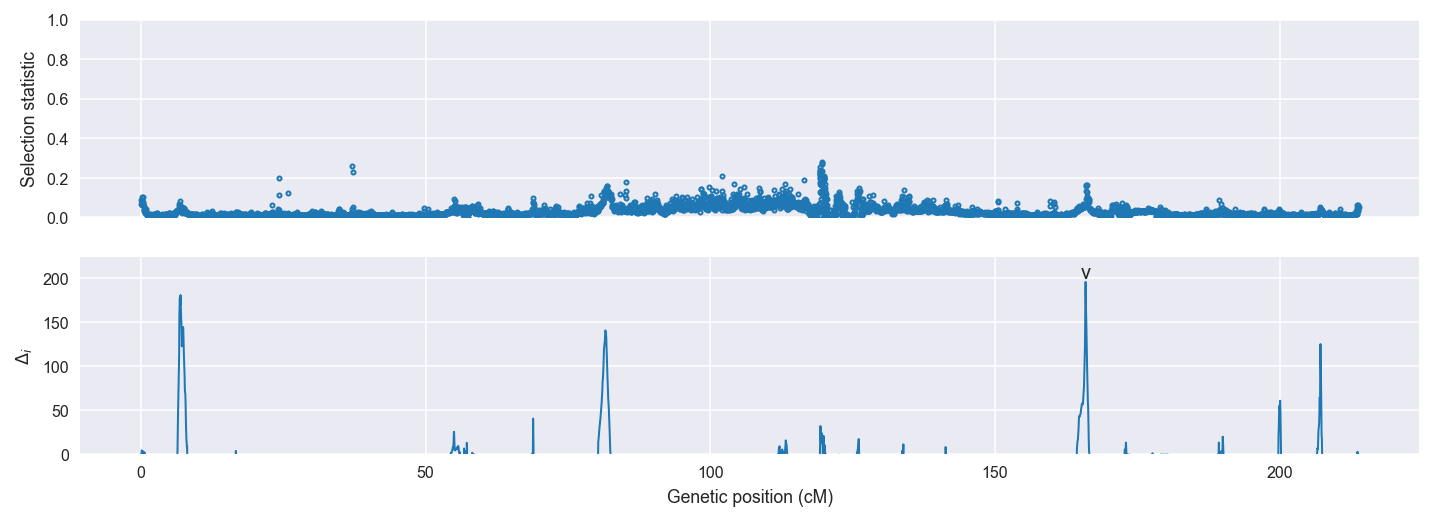

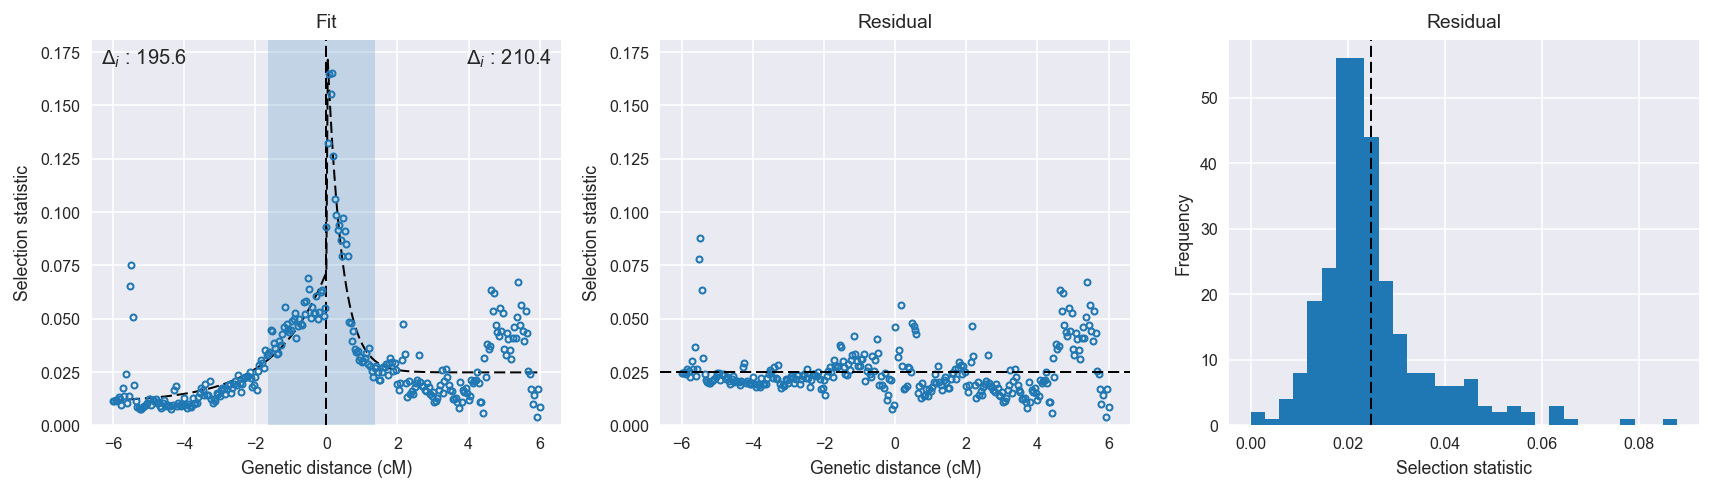

find extent of region under selection
find flanking region


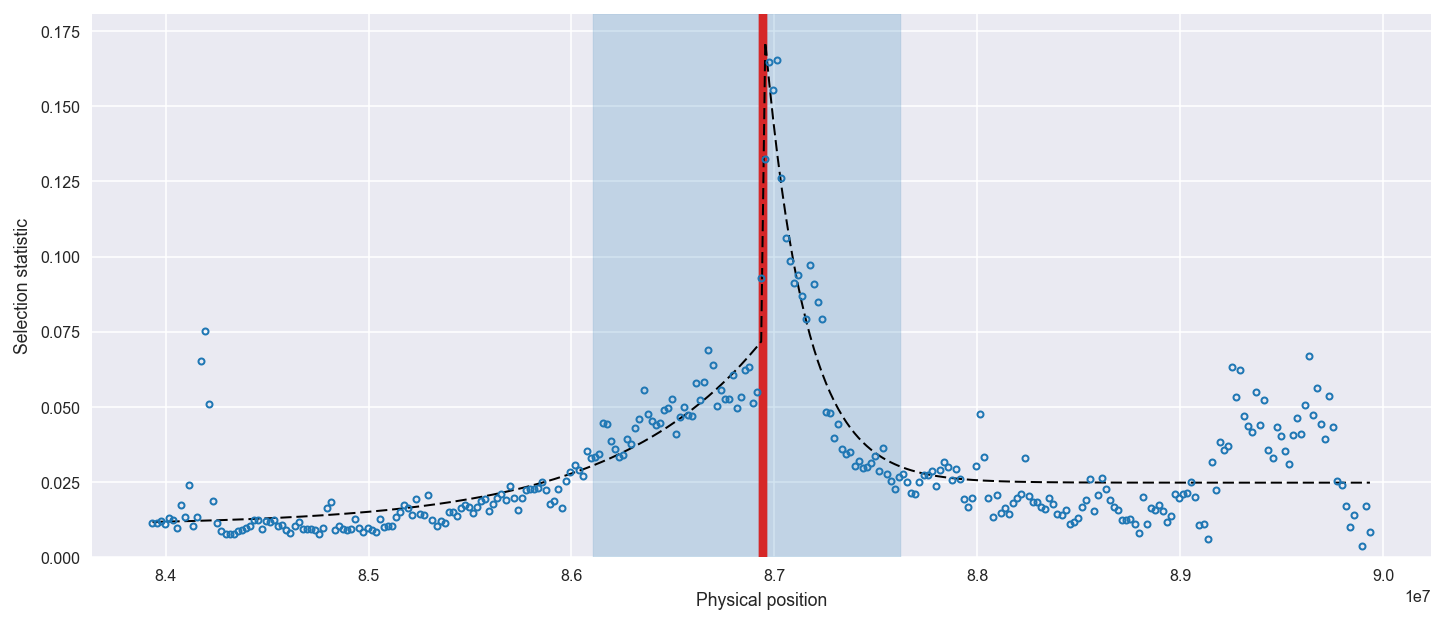

((86925106, 86965105), array([25380001, 25420000]))

In [17]:
peak = next(peaks)
peak[3:5], np.array(peak[3:5]) - len(genome['2R'])

rescan 4047 4648
scan progress 4100 156.0276074
scan progress 4200 160.0276074
scan progress 4300 164.0276074
scan progress 4400 168.0276074
scan progress 4500 172.0276074
scan progress 4600 176.0276074
********************************************************************************
Iteration 4
Peak index: 173
Delta AIC: 180.625928898
Window: 3460001 3480000
********************************************************************************


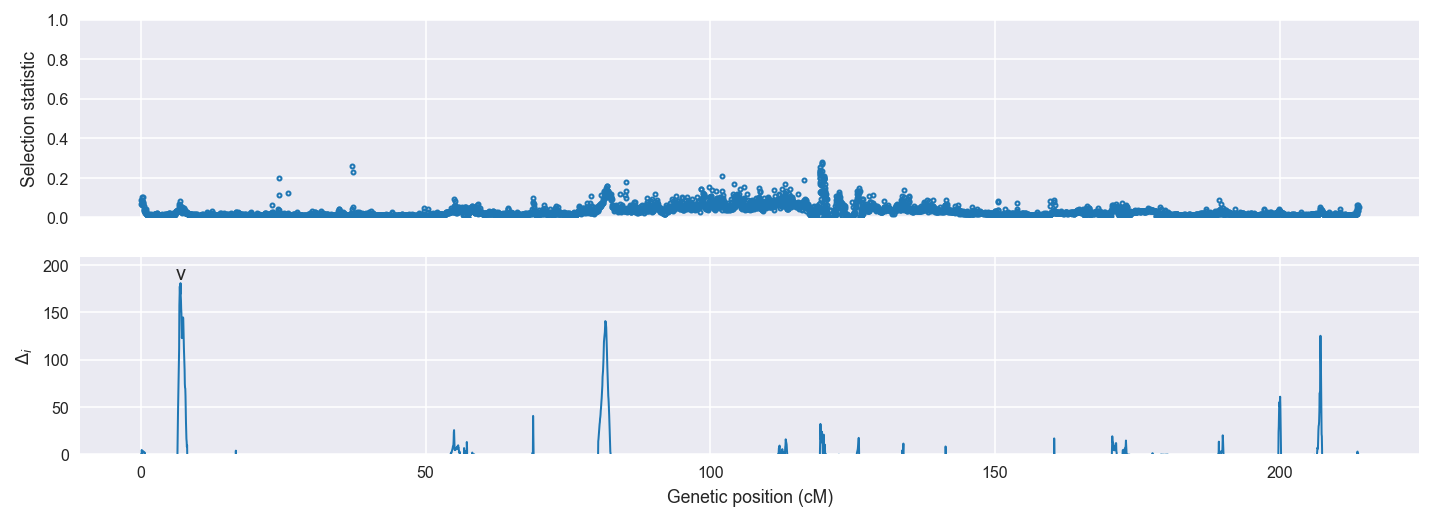

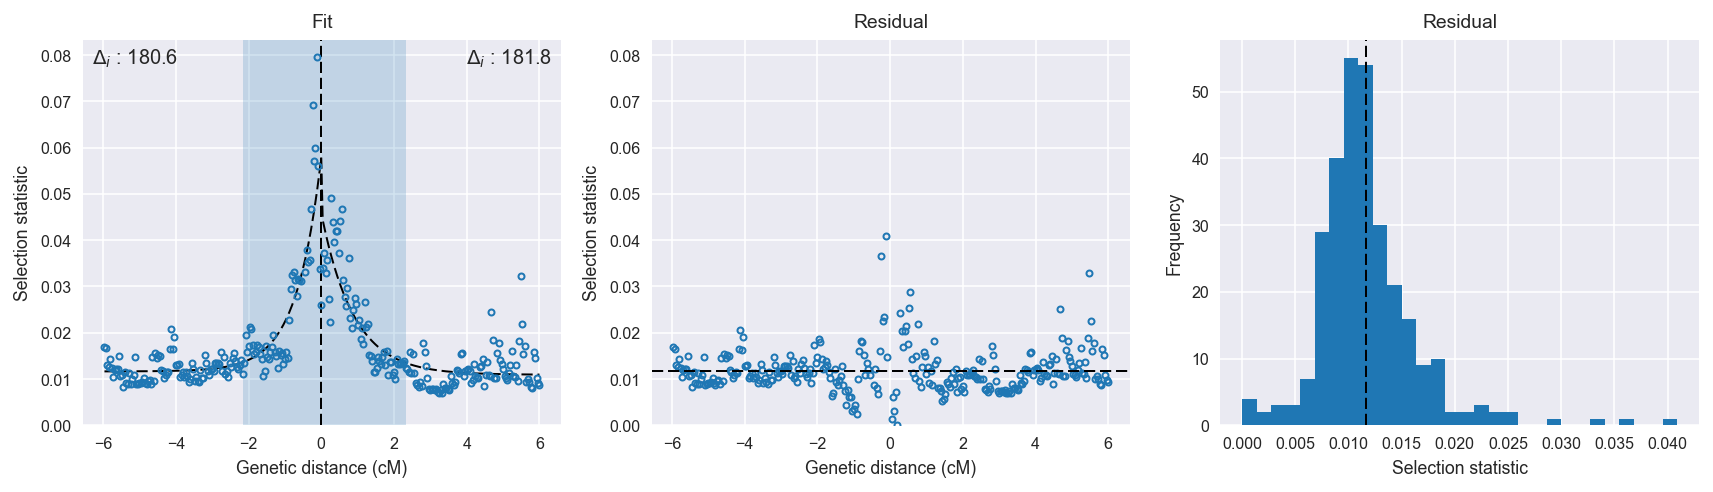

find extent of region under selection
find flanking region


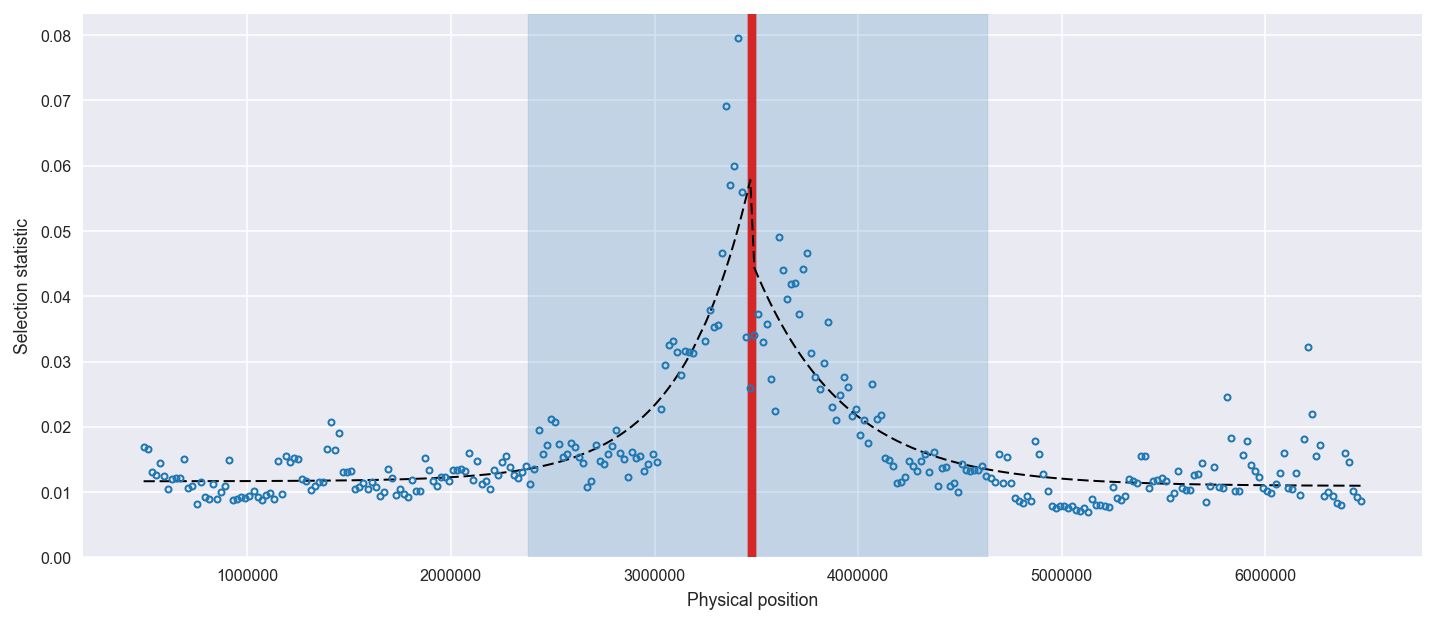

((3460001, 3500000), array([-58085104, -58045105]))

In [18]:
peak = next(peaks)
peak[3:5], np.array(peak[3:5]) - len(genome['2R'])

rescan 0 474
scan progress 0 0.04
scan progress 100 4.04
scan progress 200 8.04
scan progress 300 12.04
scan progress 400 16.04
********************************************************************************
Iteration 5
Peak index: 2038
Delta AIC: 140.605391283
Window: 40760001 40780000
********************************************************************************


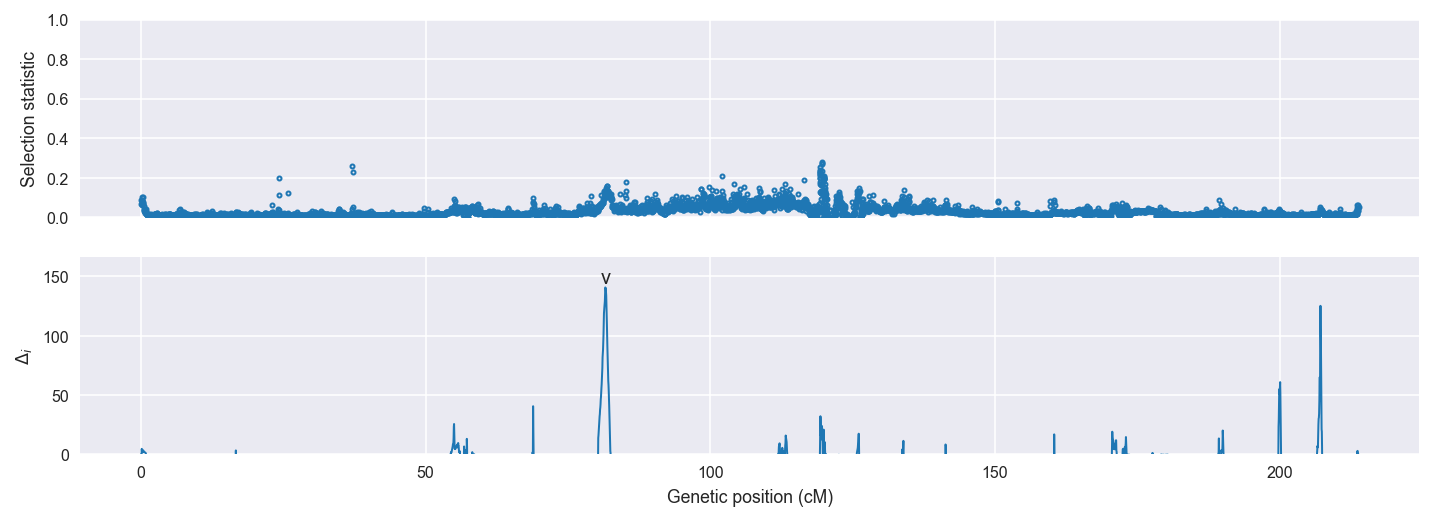

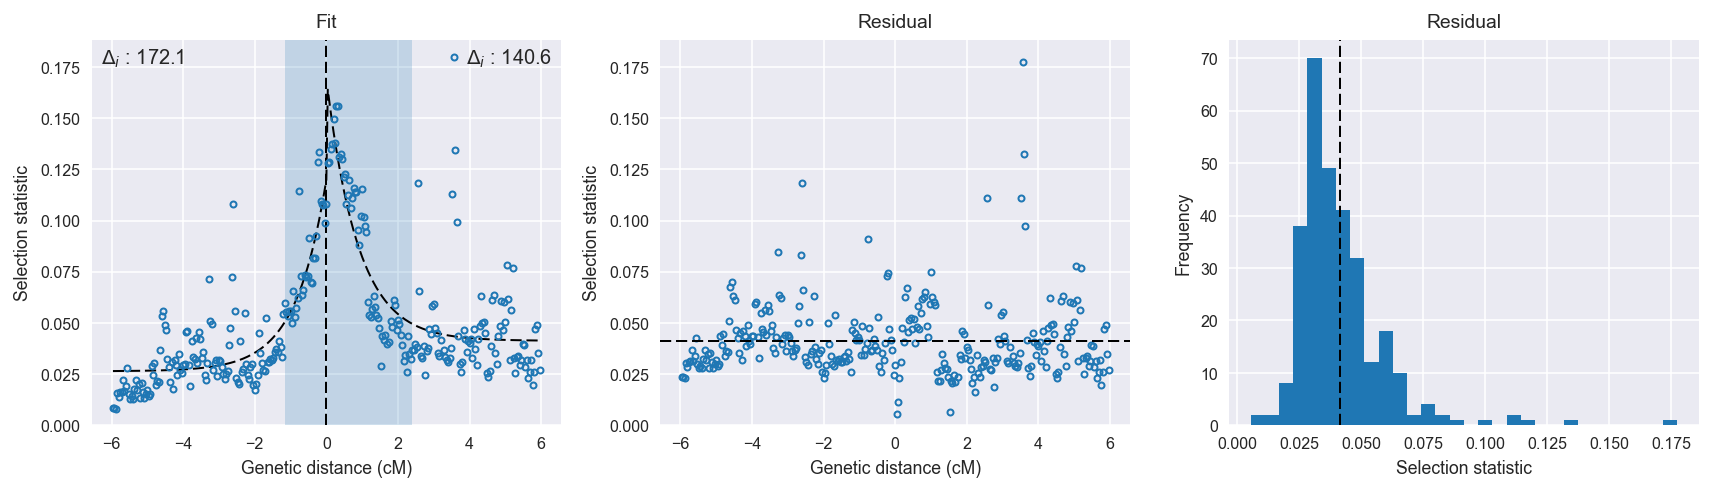

find extent of region under selection
find flanking region


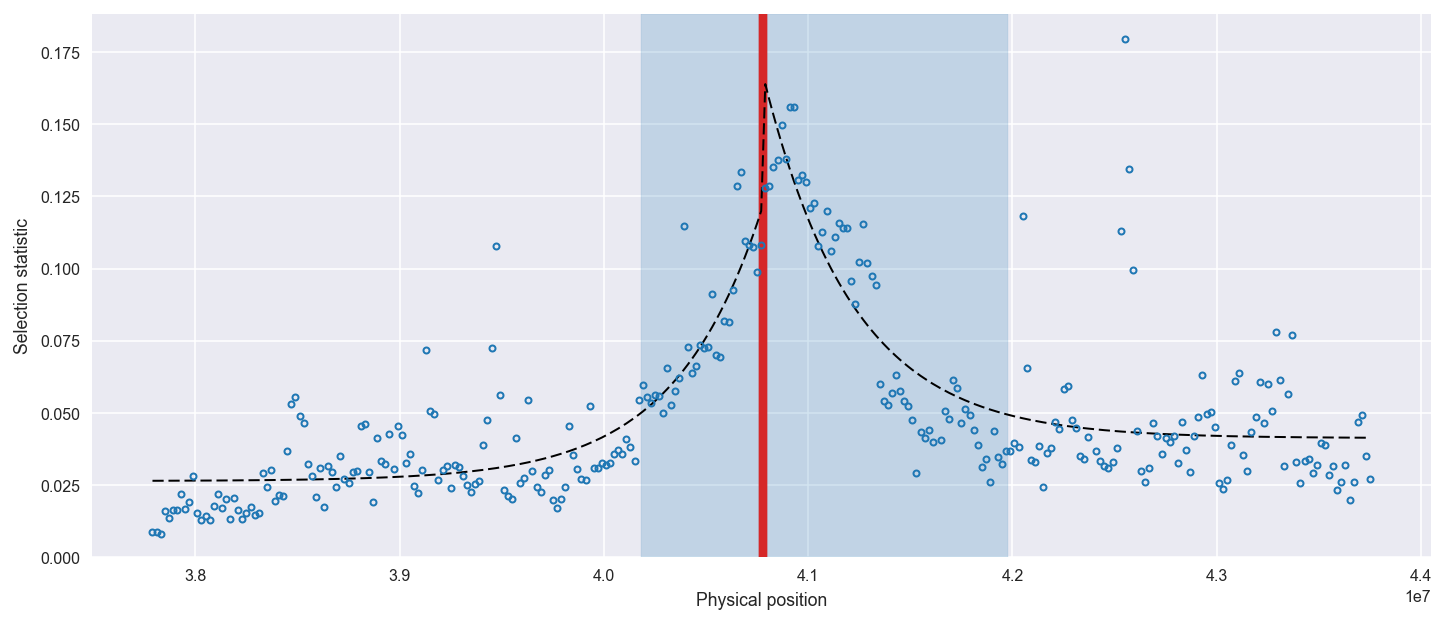

((40760001, 40800000), array([-20785104, -20745105]))

In [19]:
peak = next(peaks)
peak[3:5], np.array(peak[3:5]) - len(genome['2R'])

rescan 1739 2338
scan progress 1800 72.04
scan progress 1900 76.04
scan progress 2000 80.04
scan progress 2100 84.04
scan progress 2200 88.04
scan progress 2300 92.04
********************************************************************************
Iteration 6
Peak index: 5378
Delta AIC: 125.106072649
Window: 107545106 107565105
********************************************************************************


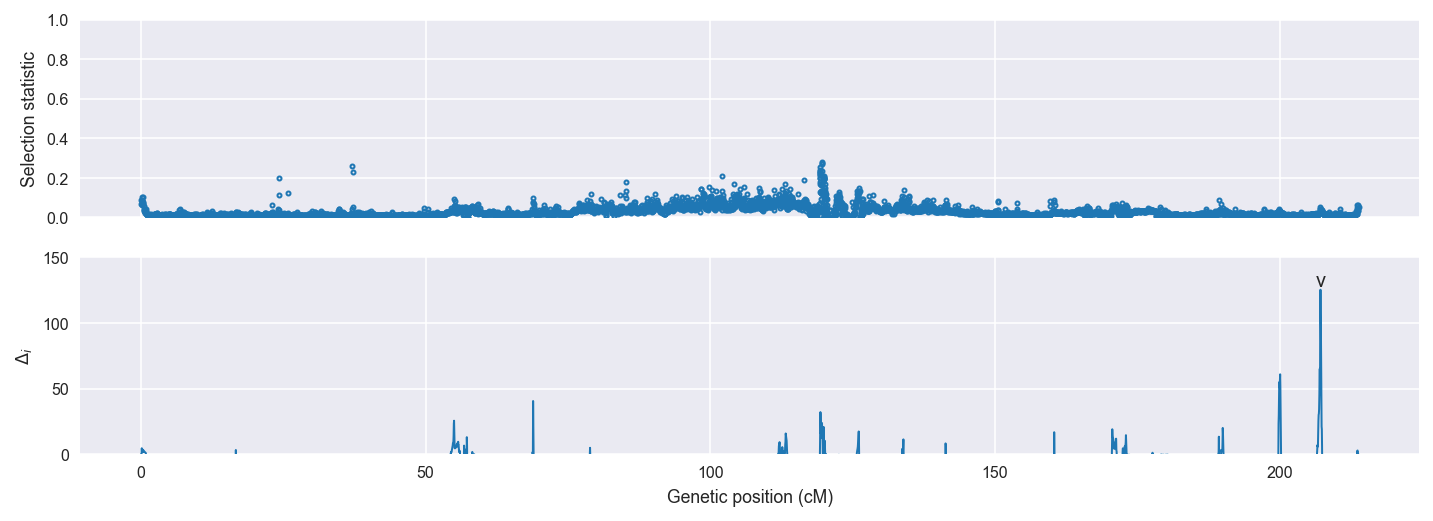

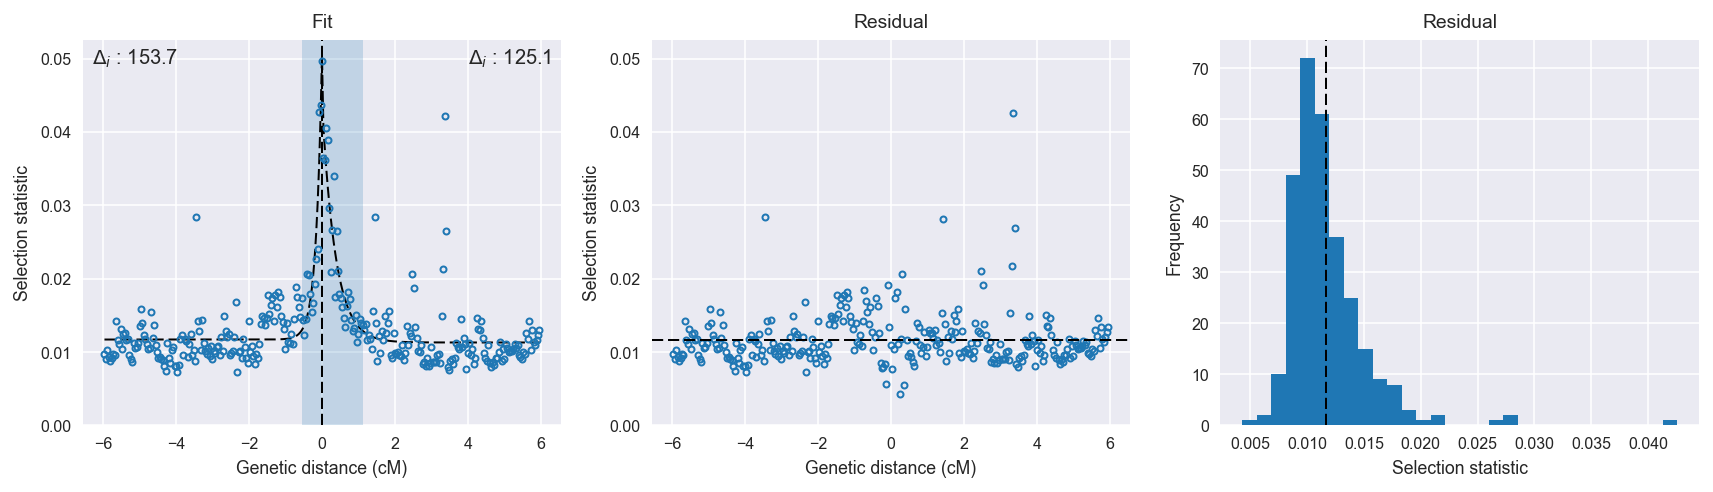

find extent of region under selection
find flanking region


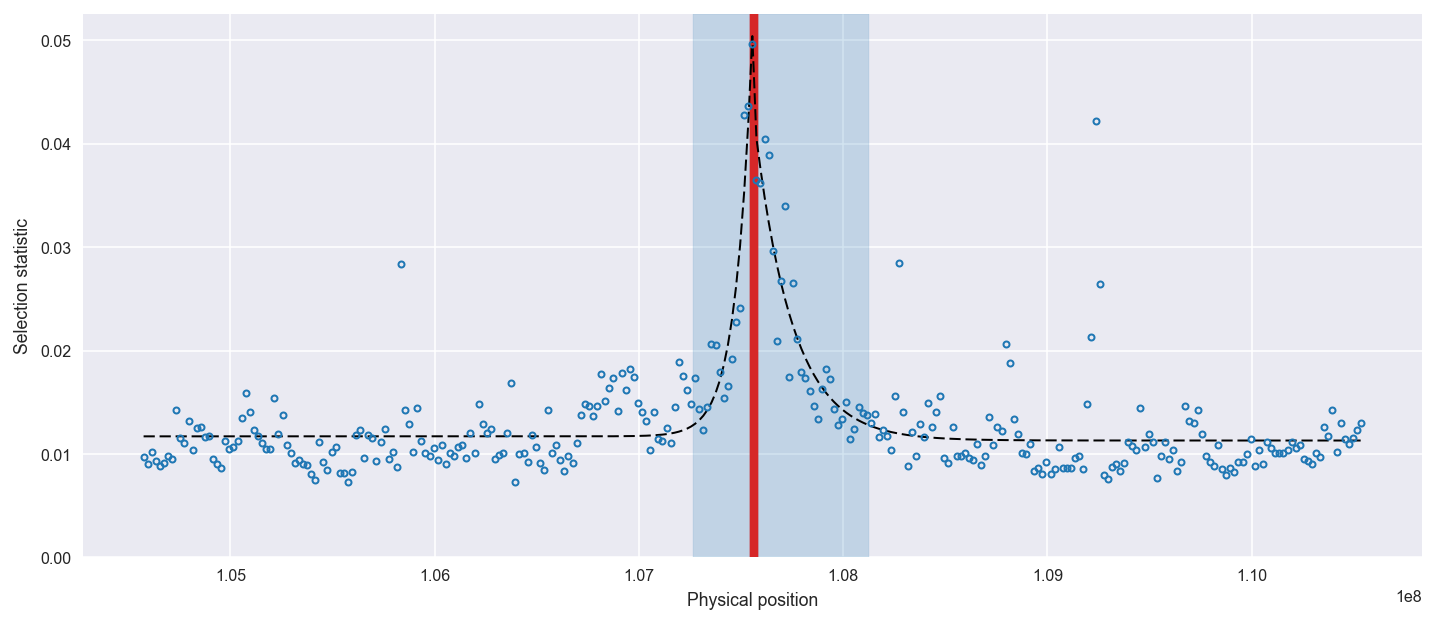

((107545106, 107585105), array([46000001, 46040000]))

In [20]:
peak = next(peaks)
peak[3:5], np.array(peak[3:5]) - len(genome['2R'])

rescan 5079 5547
scan progress 5100 196.0276074
scan progress 5200 200.0276074
scan progress 5300 204.0276074
scan progress 5400 208.0276074
scan progress 5500 212.0276074
********************************************************************************
Iteration 7
Peak index: 5201
Delta AIC: 60.8435361412
Window: 104005106 104025105
********************************************************************************


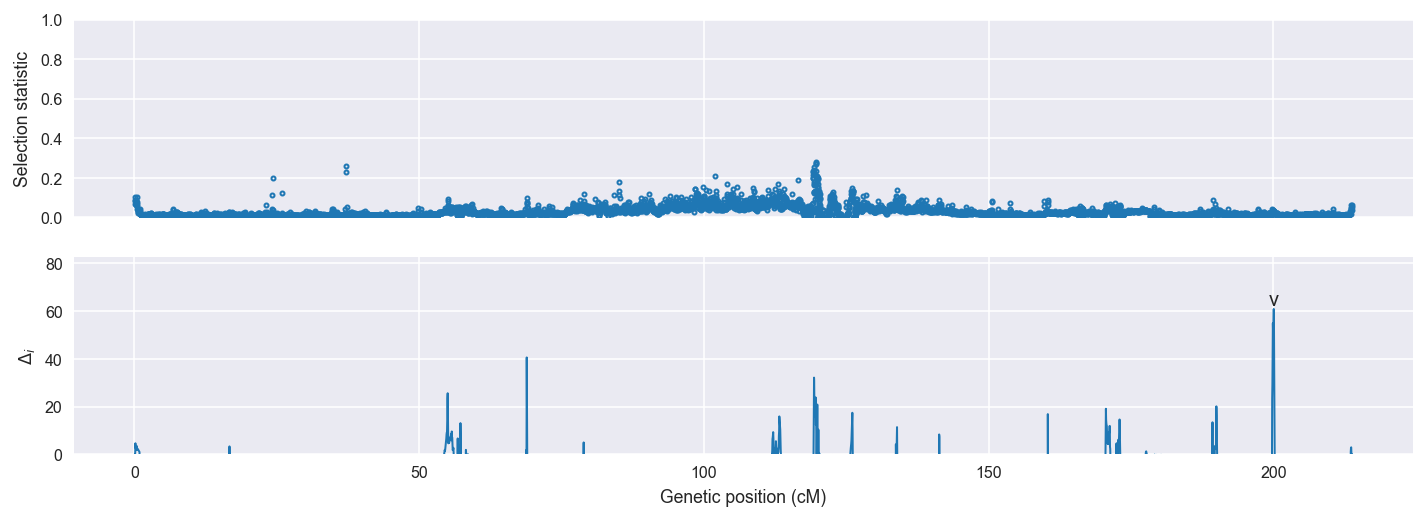

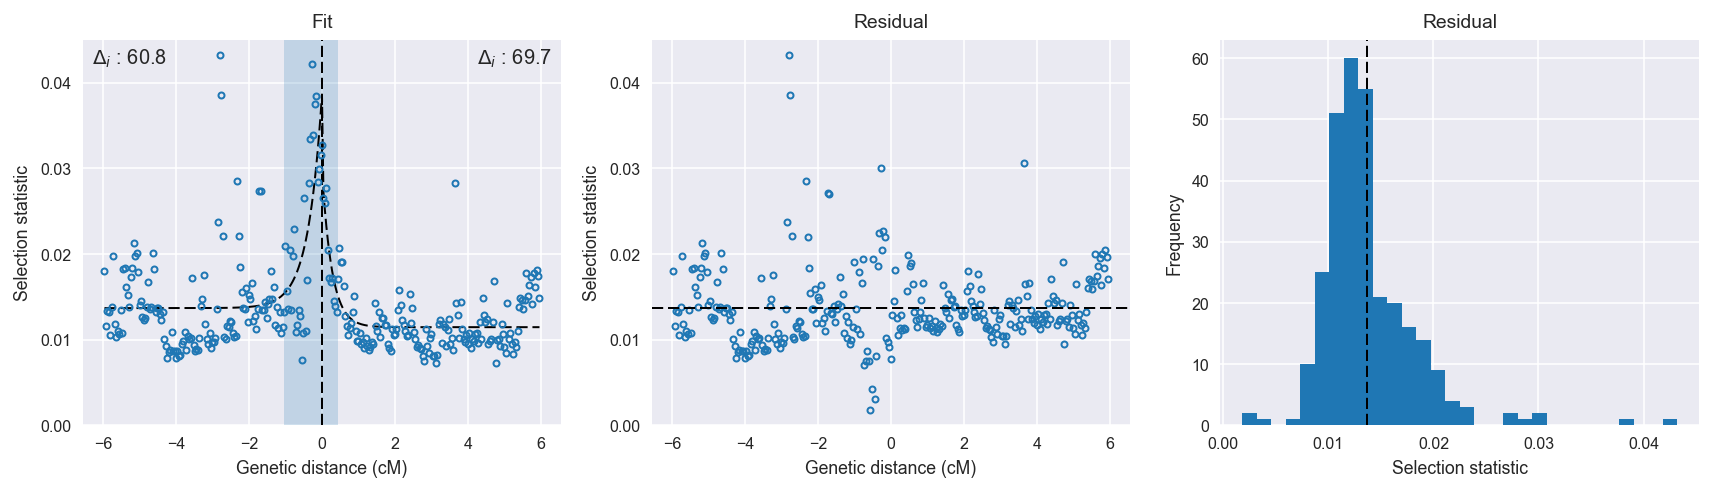

find extent of region under selection
find flanking region


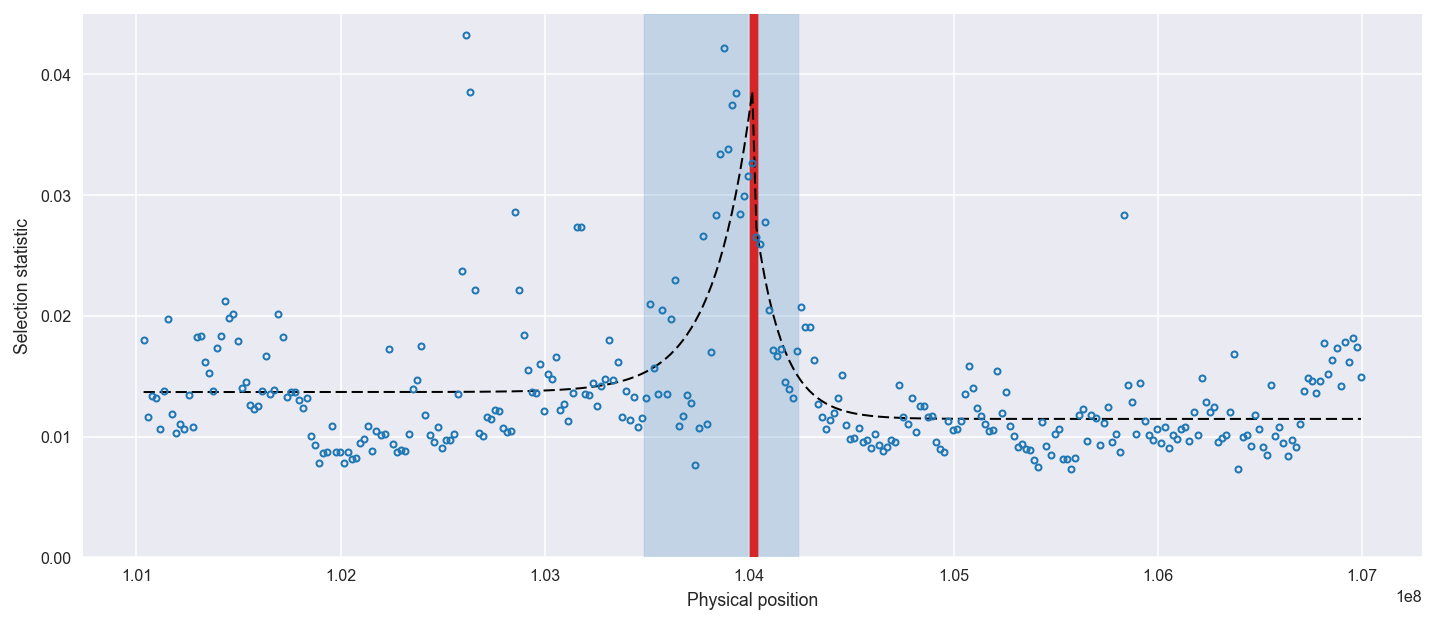

((104005106, 104045105), array([42460001, 42500000]))

In [21]:
peak = next(peaks)
peak[3:5], np.array(peak[3:5]) - len(genome['2R'])

In [22]:
peak = next(peaks)
peak[3:5], np.array(peak[3:5]) - len(genome['2R'])

rescan 4902 5501
scan progress 5000 192.0276074
scan progress 5100 196.0276074
scan progress 5200 200.0276074
scan progress 5300 204.0276074
scan progress 5400 208.0276074
scan progress 5500 212.0276074


StopIteration: 

### AOM, chr2

In [23]:
starts, stops, gpos, signal = rockies.extract_signal(
    df_h12, col='AOM', chrom=('2R', '2L'), recmap=recmap
)

N.B., for AOM, increase flank size, increase initial and minimum decay.

In [42]:
# This fits each flank independently and returns delta AIC as minimum of the two 
# flanks - better at excluding edge effects.
pairexp_fitter = rockies.PairExponentialPeakFitter(
    amplitude=lmfit.Parameter(value=0.5, vary=True, min=0),
    decay=lmfit.Parameter(value=0.5, vary=True, min=0.2),
    c=lmfit.Parameter(value=.04, vary=True, min=0, max=0.2),
    cap=lmfit.Parameter(value=1, vary=False)
)

In [43]:
#loc = slice(2600, 3600)
loc = slice(None)
peaks = iter(rockies.find_peaks(starts[loc], stops[loc], gpos[loc], signal[loc], 
                                flank=16, fitter=pairexp_fitter, 
                                min_delta_aic=50, extend_delta_aic=0, debug=True))

scan progress 0 0.04
scan progress 100 4.04
scan progress 200 8.04
scan progress 300 12.04
scan progress 400 16.04
scan progress 500 20.04
scan progress 600 24.04
scan progress 700 28.04
scan progress 800 32.04
scan progress 900 36.04
scan progress 1000 40.04
scan progress 1100 44.04
scan progress 1200 48.04
scan progress 1300 52.04
scan progress 1400 56.04
scan progress 1500 60.04
scan progress 1600 64.04
scan progress 1700 68.04
scan progress 1800 72.04
scan progress 1900 76.04
scan progress 2000 80.04
scan progress 2100 84.04
scan progress 2200 88.04
scan progress 2300 92.04
scan progress 2400 96.04
scan progress 2500 100.04
scan progress 2600 104.04
scan progress 2700 108.04
scan progress 2800 112.04
scan progress 2900 116.04
scan progress 3000 118.5906878
scan progress 3100 119.7817508
scan progress 3200 121.021487
scan progress 3300 125.021487
scan progress 3400 128.0276074
scan progress 3500 132.0276074
scan progress 3600 136.0276074
scan progress 3700 140.0276074
scan progress 

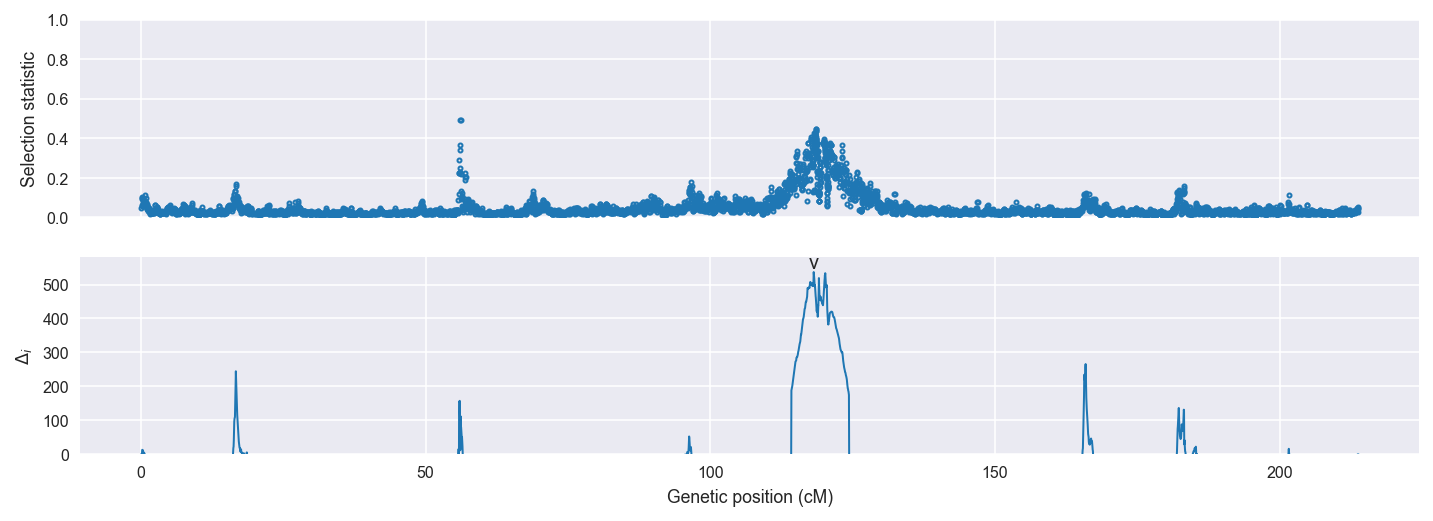

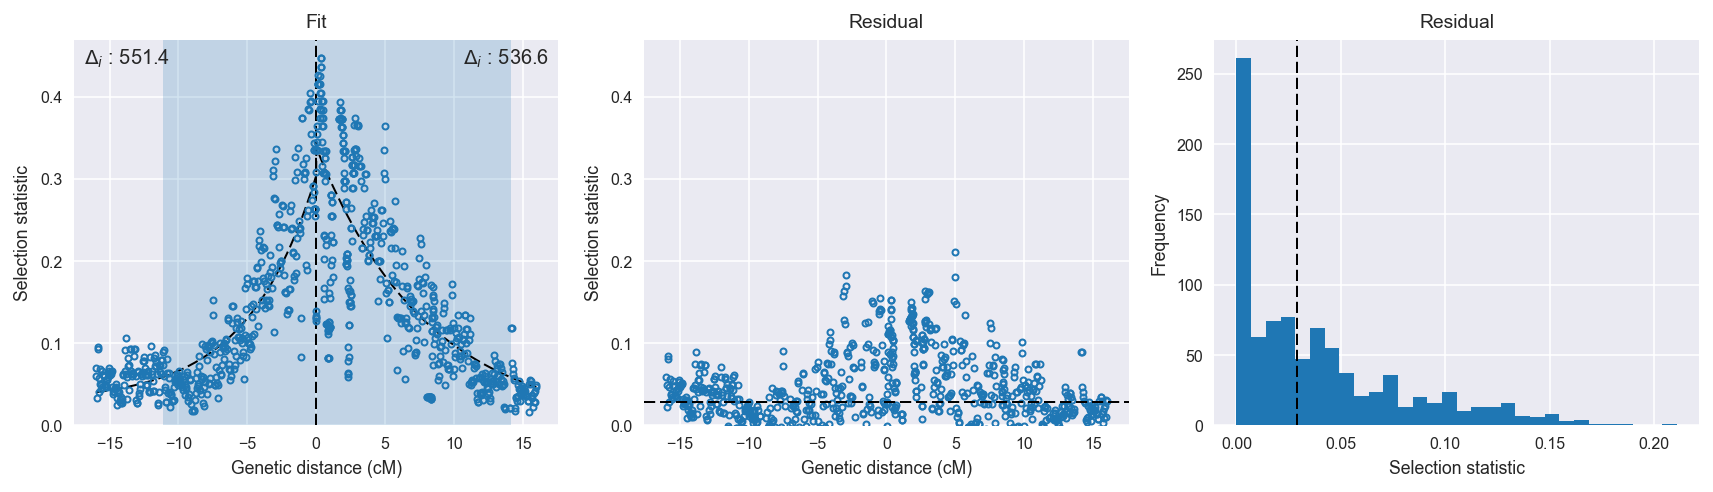

find extent of region under selection
find flanking region


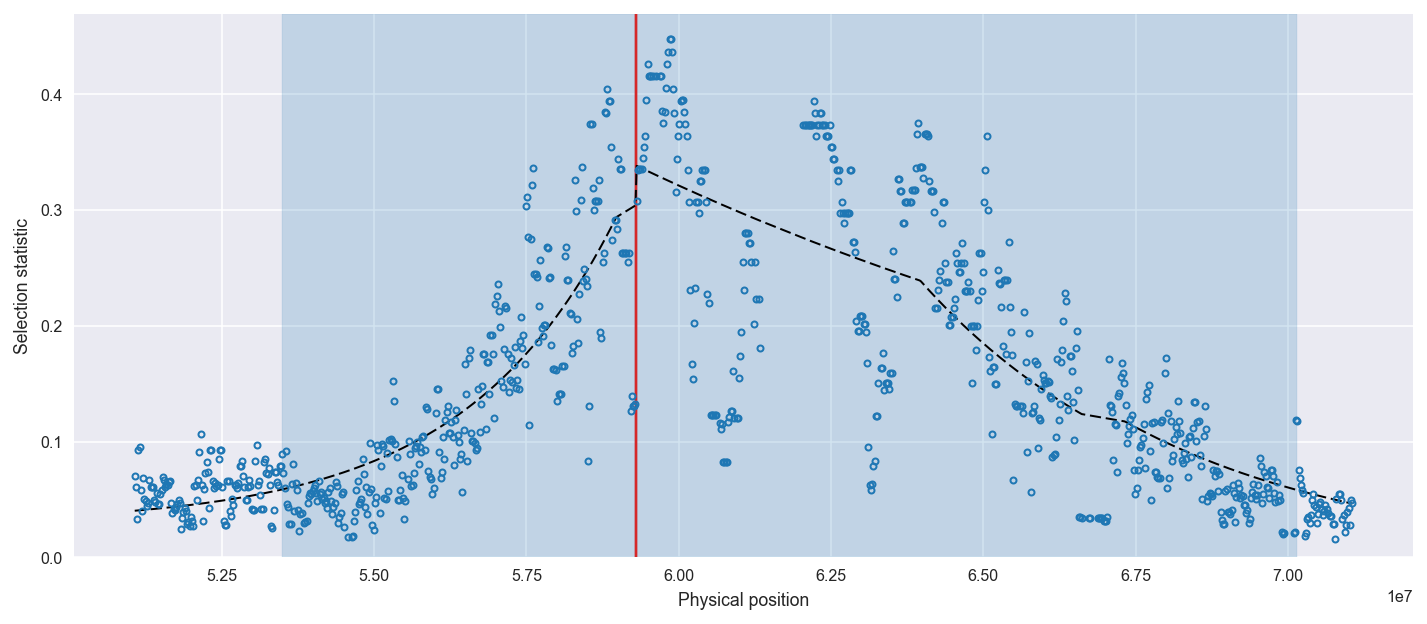

((59280001, 59320000), array([-2265104, -2225105]))

In [44]:
peak = next(peaks)
peak[3:5], np.array(peak[3:5]) - len(genome['2R'])

rescan 2153 3954
scan progress 2200 88.04
scan progress 2300 92.04
scan progress 2400 96.04
scan progress 2500 100.04
scan progress 2600 104.04
scan progress 2700 108.04
scan progress 2800 112.04
scan progress 2900 116.04
scan progress 3000 118.5906878
scan progress 3100 119.7817508
scan progress 3200 121.021487
scan progress 3300 125.021487
scan progress 3400 128.0276074
scan progress 3500 132.0276074
scan progress 3600 136.0276074
scan progress 3700 140.0276074
scan progress 3800 144.0276074
scan progress 3900 148.0276074
********************************************************************************
Iteration 1
Peak index: 4347
Delta AIC: 265.853451648
Window: 86925106 86945105
********************************************************************************


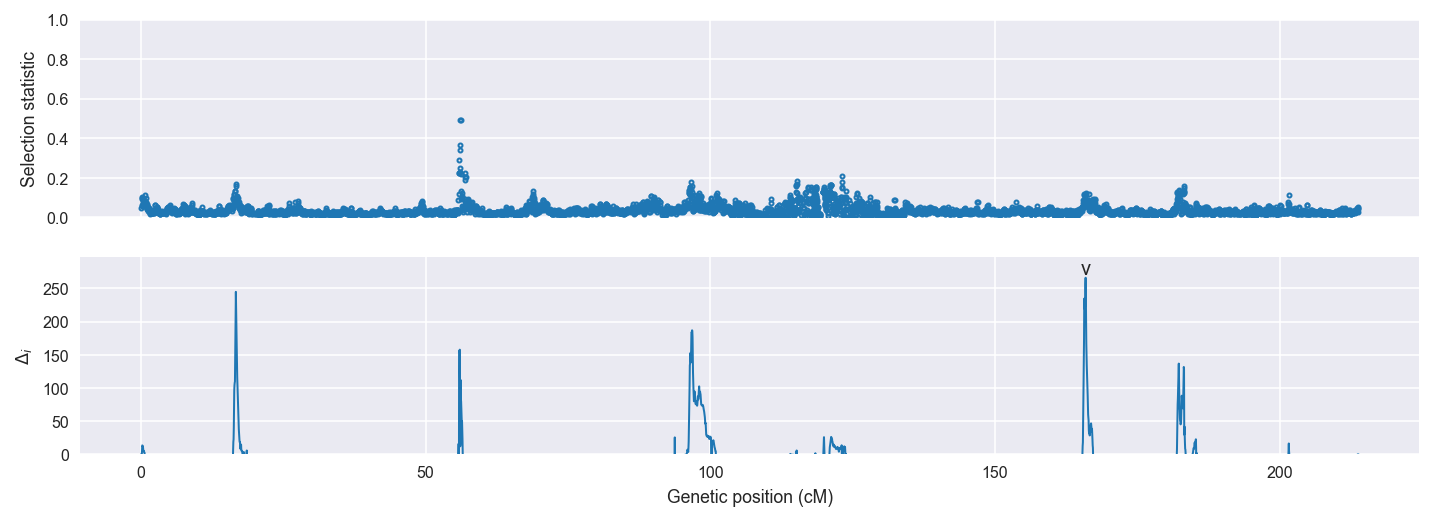

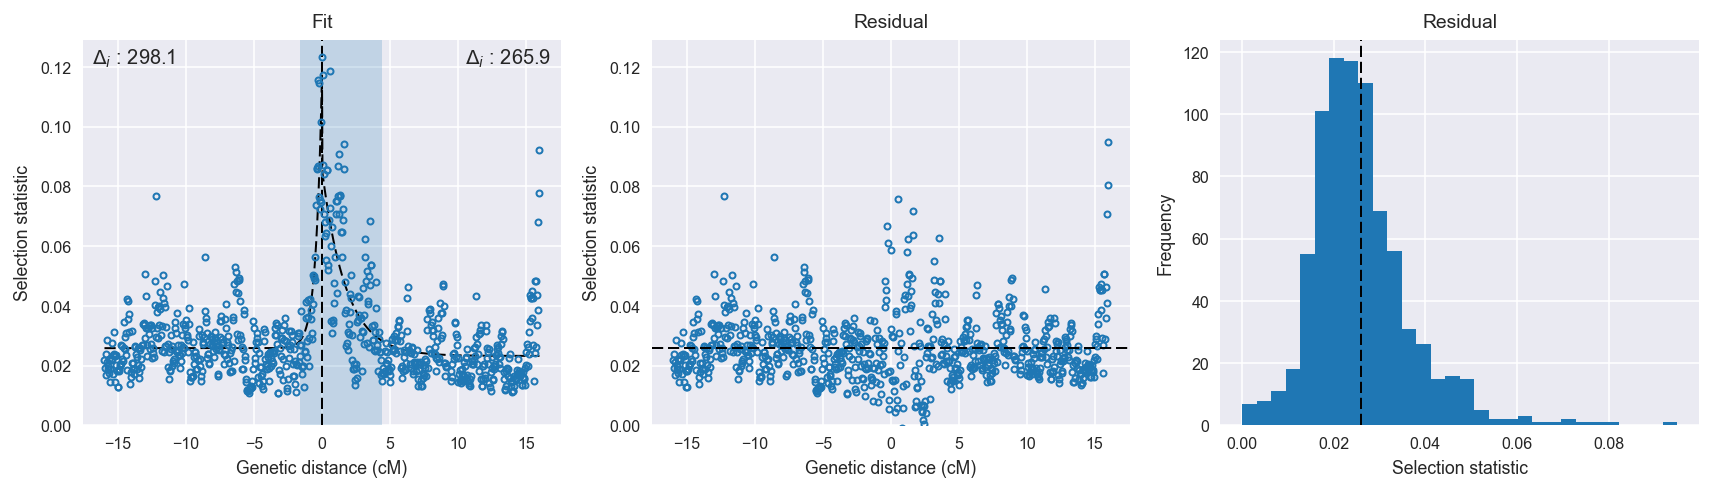

find extent of region under selection
find flanking region


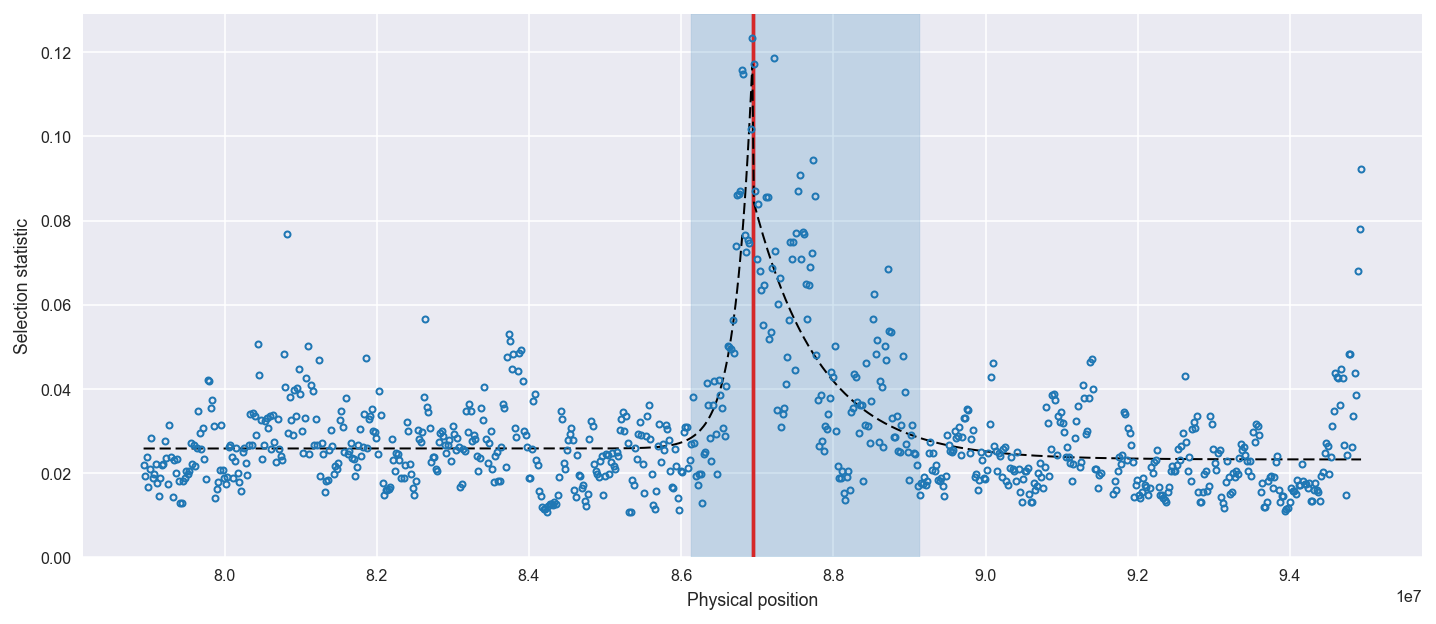

((86925106, 86965105), array([25380001, 25420000]))

In [45]:
peak = next(peaks)
peak[3:5], np.array(peak[3:5]) - len(genome['2R'])

rescan 3547 5147
scan progress 3600 136.0276074
scan progress 3700 140.0276074
scan progress 3800 144.0276074
scan progress 3900 148.0276074
scan progress 4000 152.0276074
scan progress 4100 156.0276074
scan progress 4200 160.0276074
scan progress 4300 164.0276074
scan progress 4400 168.0276074
scan progress 4500 172.0276074
scan progress 4600 176.0276074
scan progress 4700 180.0276074
scan progress 4800 184.0276074
scan progress 4900 188.0276074
scan progress 5000 192.0276074
scan progress 5100 196.0276074
********************************************************************************
Iteration 2
Peak index: 416
Delta AIC: 244.61750232
Window: 8320001 8340000
********************************************************************************


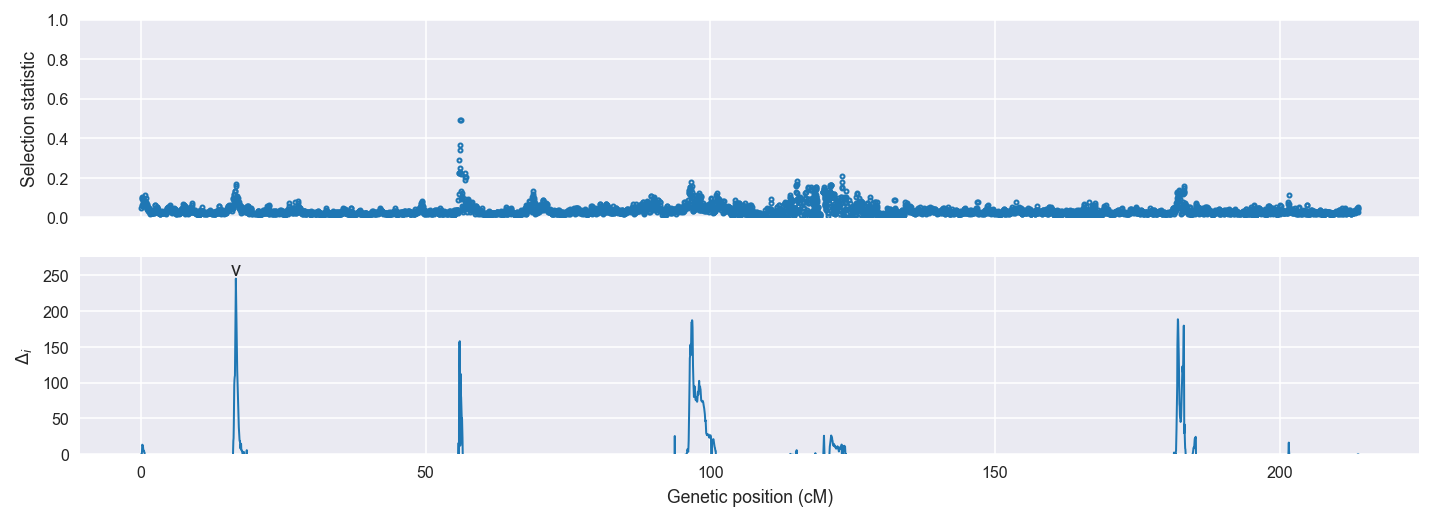

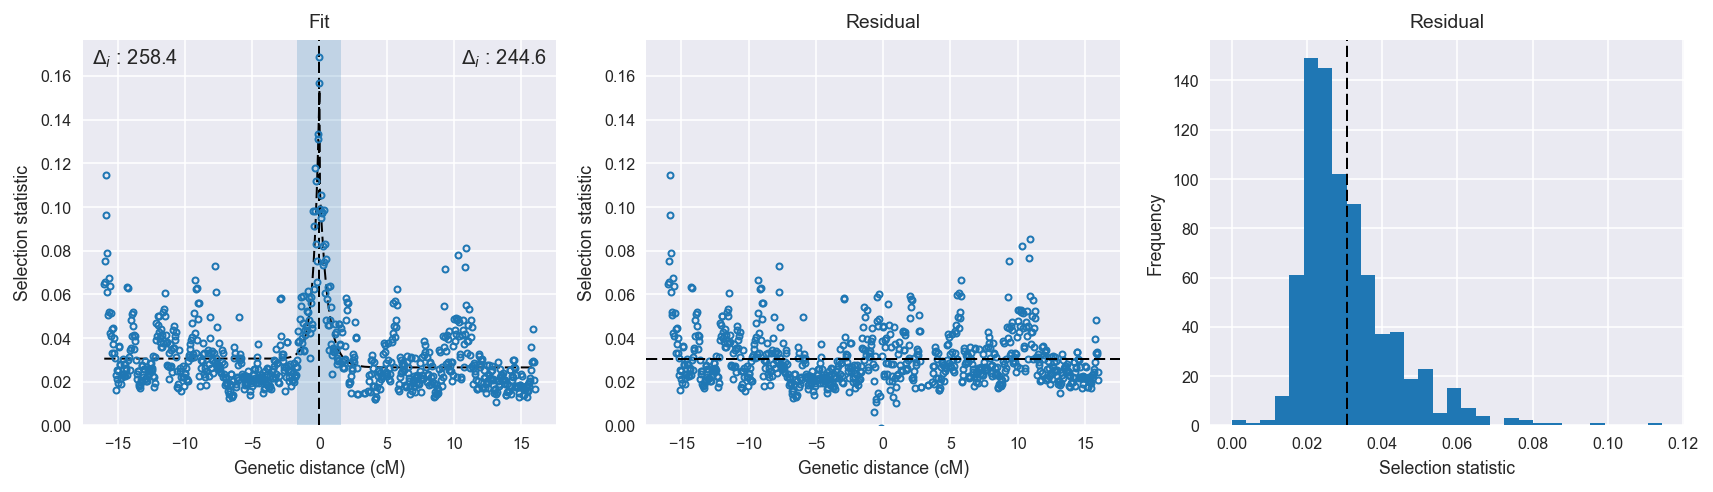

find extent of region under selection
find flanking region


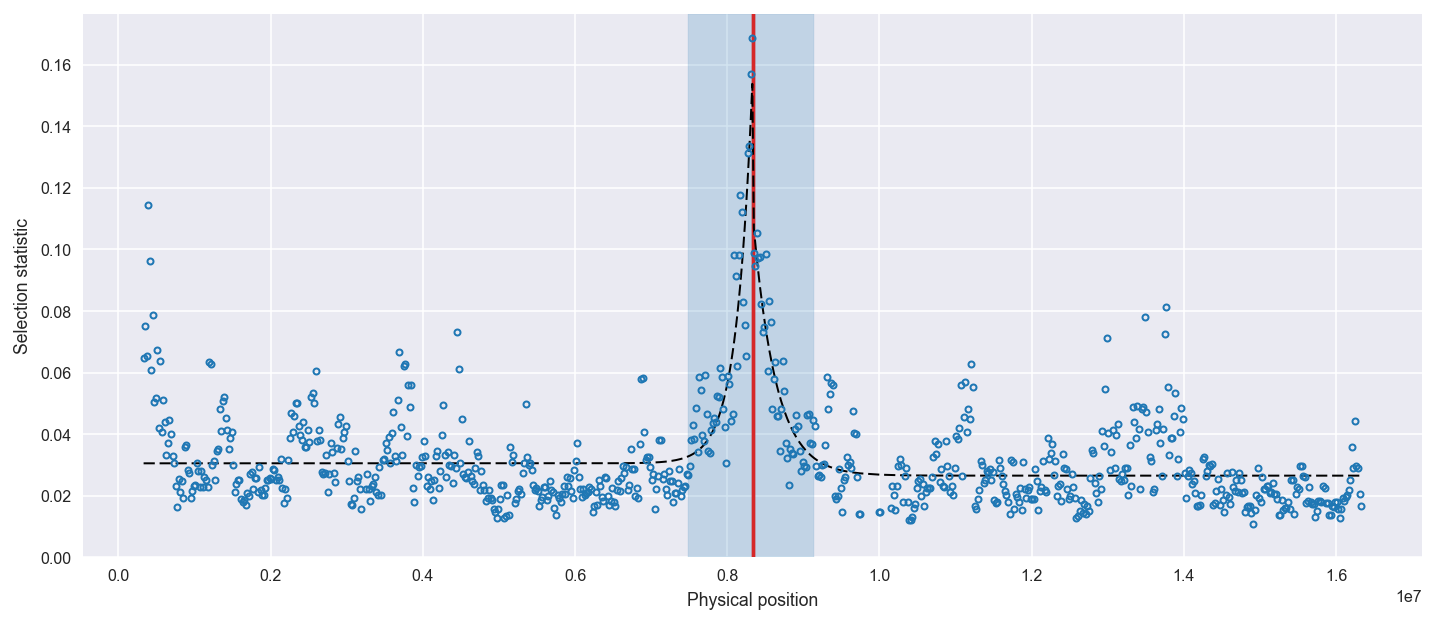

((8320001, 8360000), array([-53225104, -53185105]))

In [46]:
peak = next(peaks)
peak[3:5], np.array(peak[3:5]) - len(genome['2R'])

rescan 0 1217
scan progress 0 0.04
scan progress 100 4.04
scan progress 200 8.04
scan progress 300 12.04
scan progress 400 16.04
scan progress 500 20.04
scan progress 600 24.04
scan progress 700 28.04
scan progress 800 32.04
scan progress 900 36.04
scan progress 1000 40.04
scan progress 1100 44.04
scan progress 1200 48.04
********************************************************************************
Iteration 3
Peak index: 4752
Delta AIC: 188.105946948
Window: 95025106 95045105
********************************************************************************


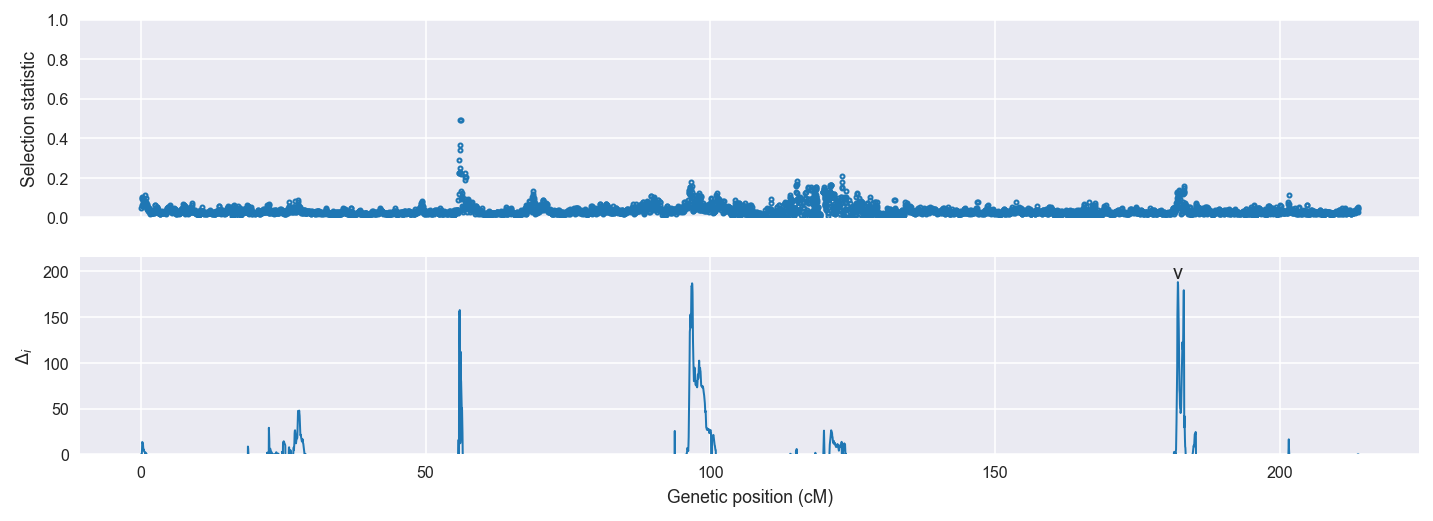

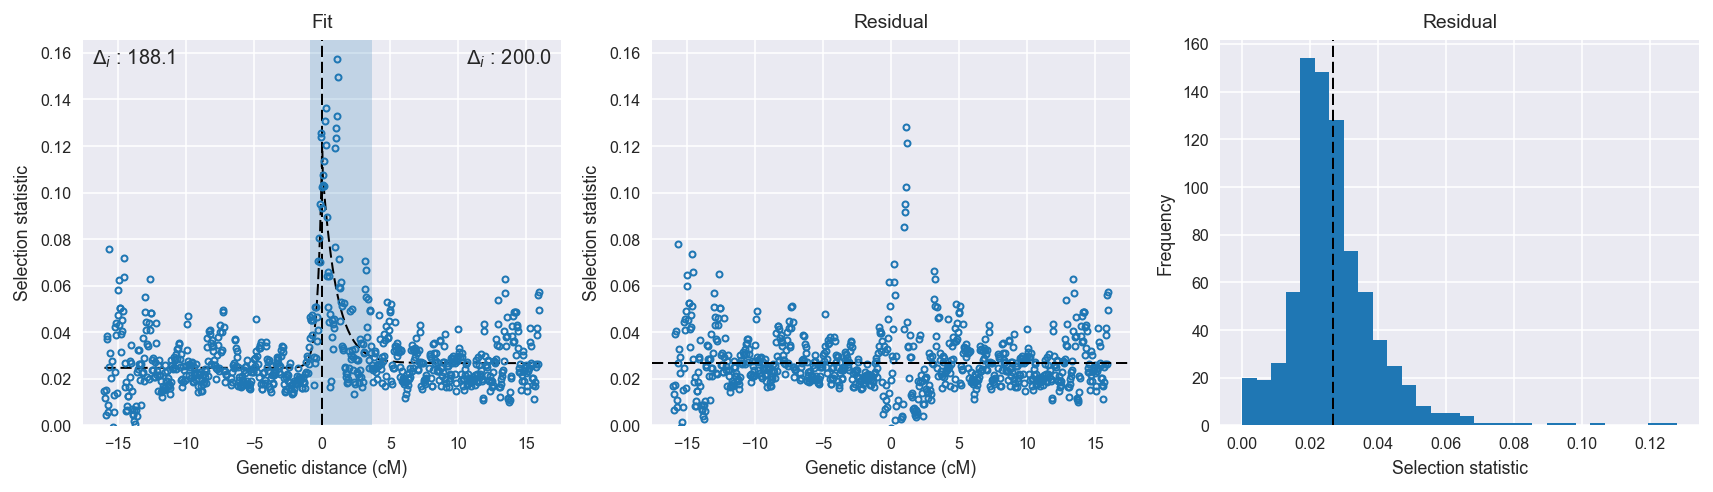

find extent of region under selection
find flanking region


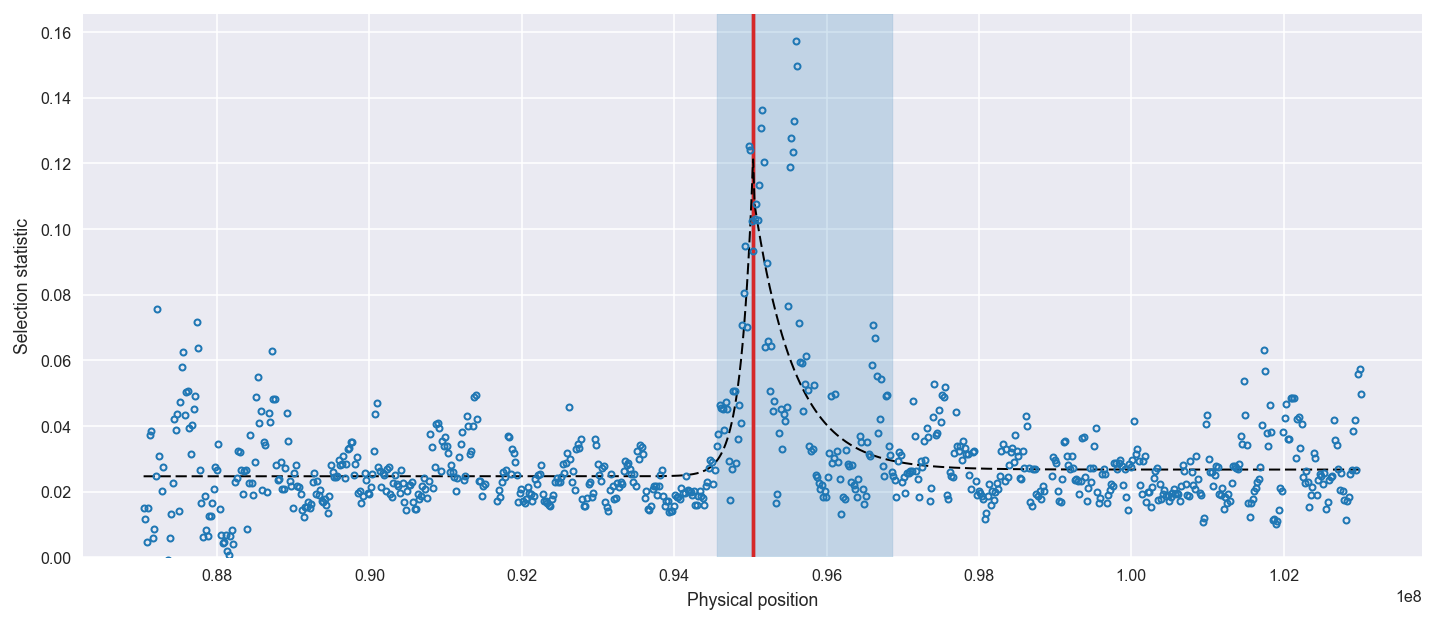

((95025106, 95065105), array([33480001, 33520000]))

In [47]:
peak = next(peaks)
peak[3:5], np.array(peak[3:5]) - len(genome['2R'])

rescan 3952 5547
scan progress 4000 152.0276074
scan progress 4100 156.0276074
scan progress 4200 160.0276074
scan progress 4300 164.0276074
scan progress 4400 168.0276074
scan progress 4500 172.0276074
scan progress 4600 176.0276074
scan progress 4700 180.0276074
scan progress 4800 184.0276074
scan progress 4900 188.0276074
scan progress 5000 192.0276074
scan progress 5100 196.0276074
scan progress 5200 200.0276074
scan progress 5300 204.0276074
scan progress 5400 208.0276074
scan progress 5500 212.0276074
********************************************************************************
Iteration 4
Peak index: 2419
Delta AIC: 186.821201847
Window: 48380001 48400000
********************************************************************************


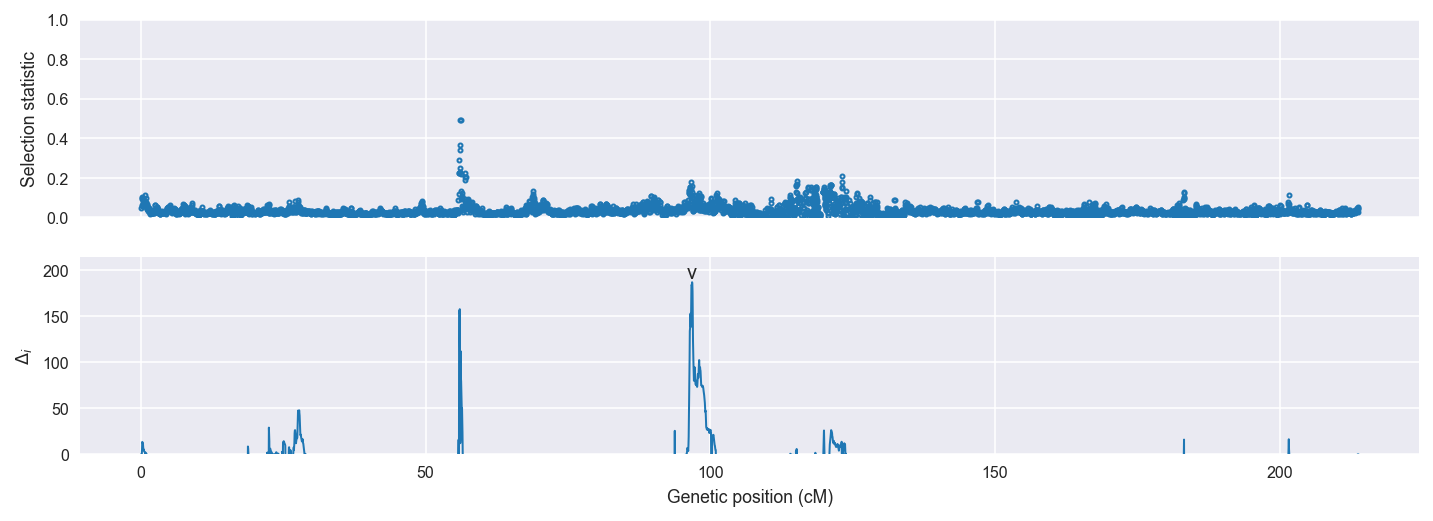

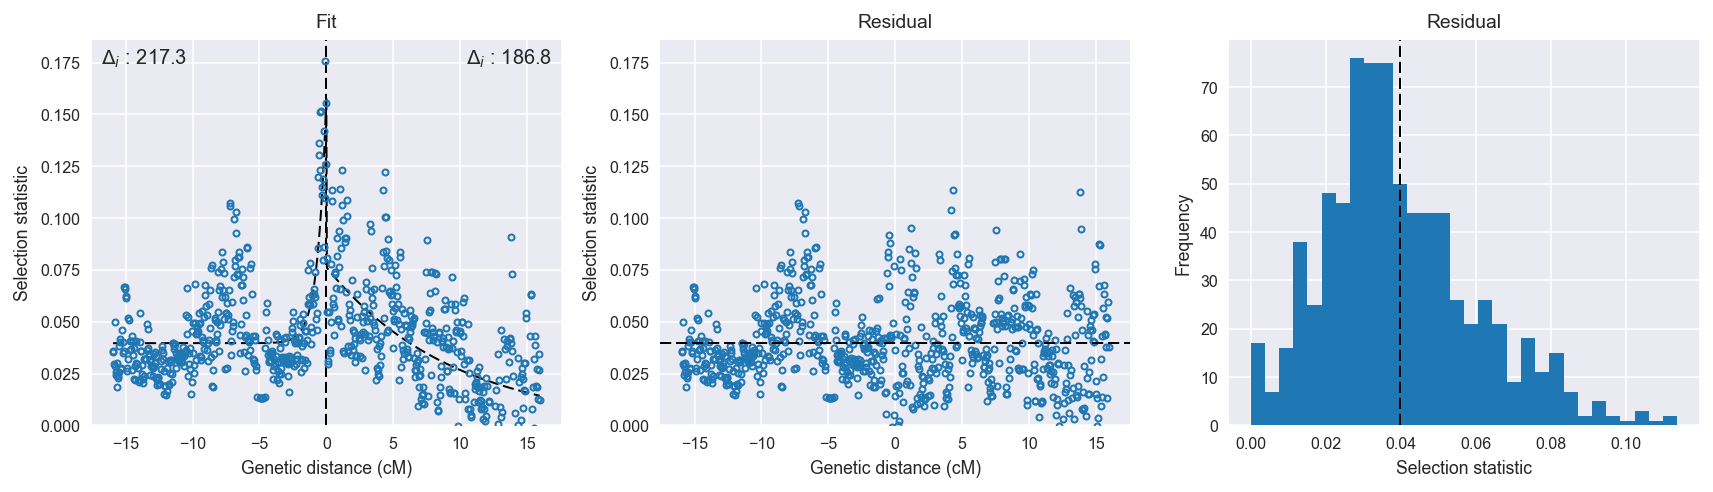

find extent of region under selection
find flanking region


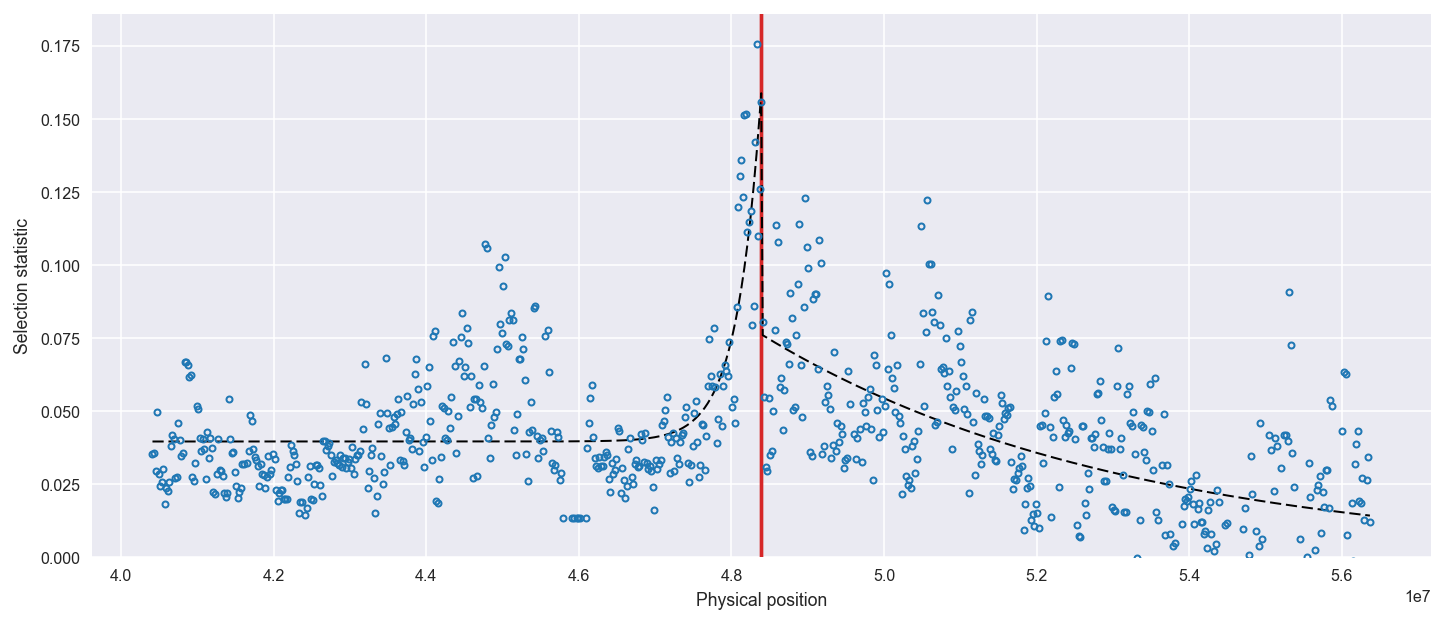

((48380001, 48420000), array([-13165104, -13125105]))

In [48]:
peak = next(peaks)
peak[3:5], np.array(peak[3:5]) - len(genome['2R'])

rescan 1620 3420
scan progress 1700 68.04
scan progress 1800 72.04
scan progress 1900 76.04
scan progress 2000 80.04
scan progress 2100 84.04
scan progress 2200 88.04
scan progress 2300 92.04
scan progress 2400 96.04
scan progress 2500 100.04
scan progress 2600 104.04
scan progress 2700 108.04
scan progress 2800 112.04
scan progress 2900 116.04
scan progress 3000 118.5906878
scan progress 3100 119.7817508
scan progress 3200 121.021487
scan progress 3300 125.021487
scan progress 3400 128.0276074
********************************************************************************
Iteration 5
Peak index: 1399
Delta AIC: 157.592806449
Window: 27980001 28000000
********************************************************************************


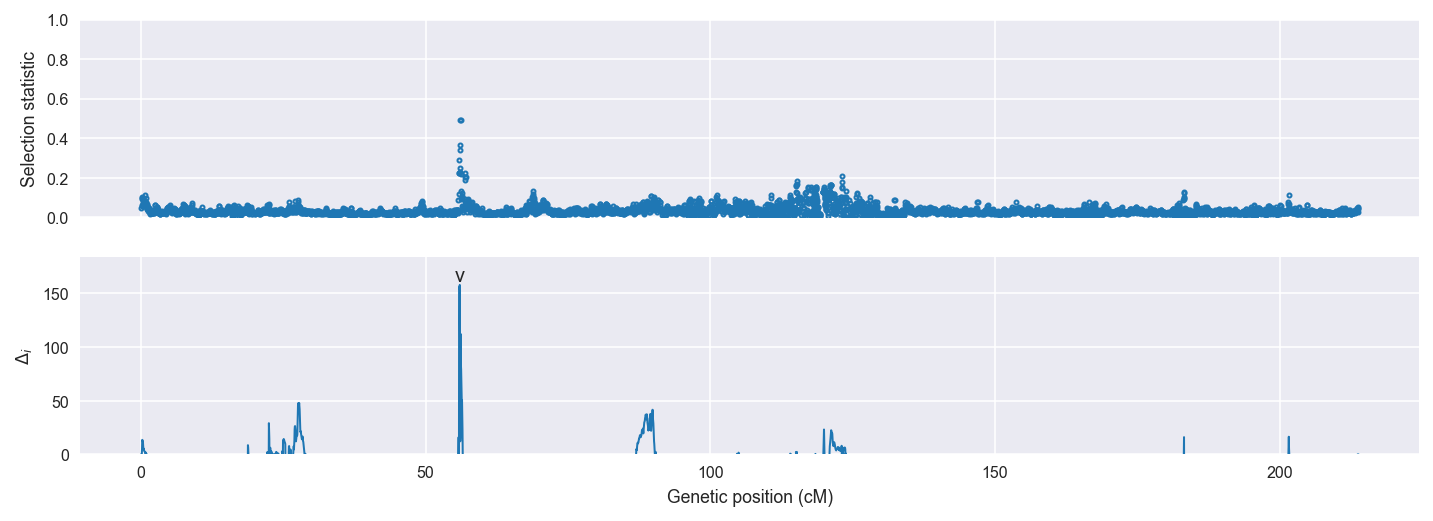

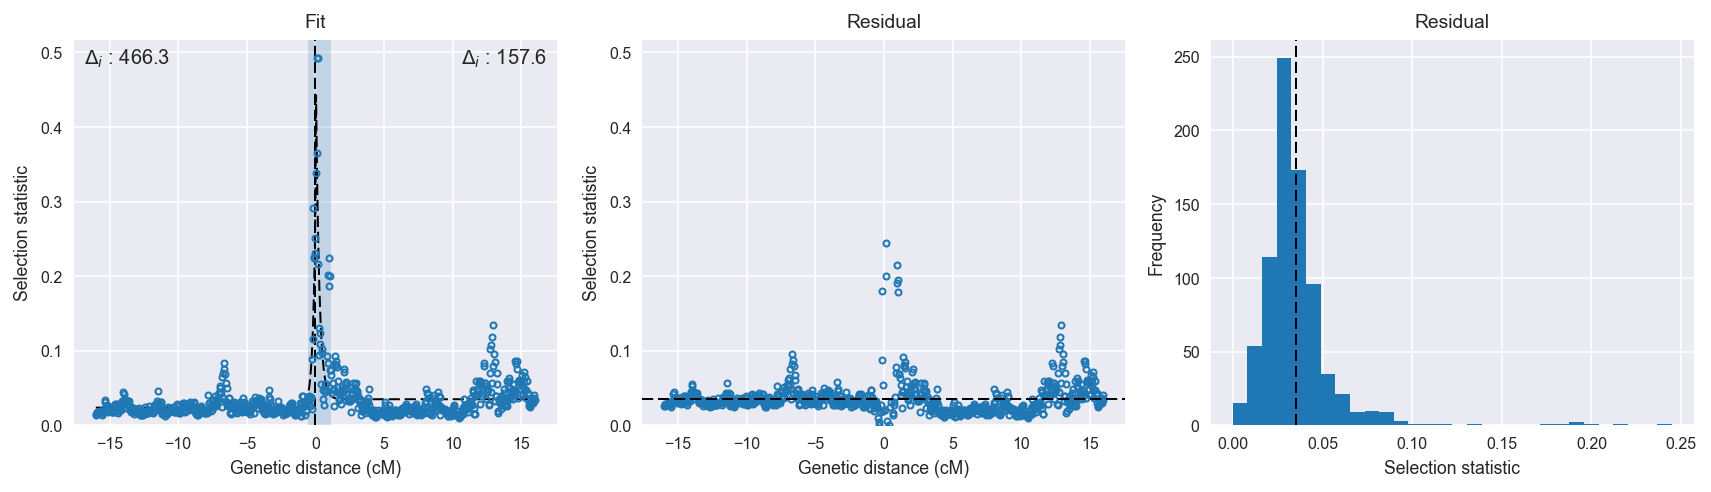

find extent of region under selection
find flanking region


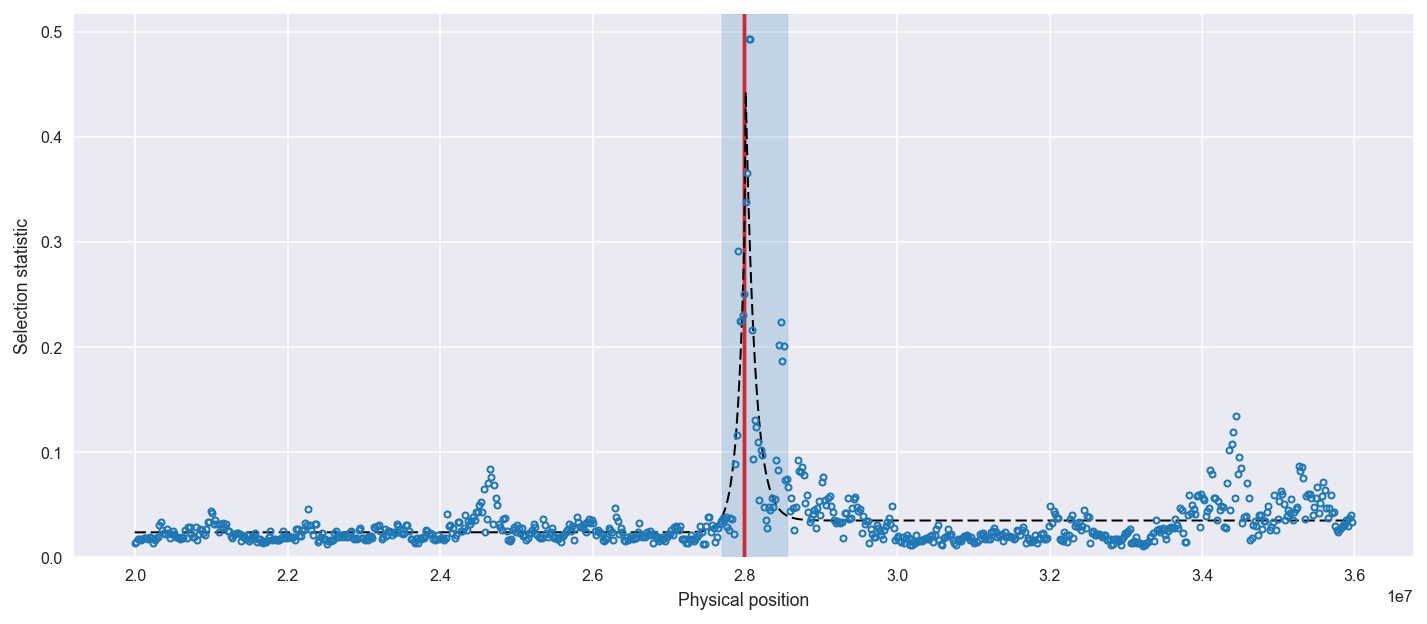

((27980001, 28020000), array([-33565104, -33525105]))

In [49]:
peak = next(peaks)
peak[3:5], np.array(peak[3:5]) - len(genome['2R'])

In [50]:
peak = next(peaks)
peak[3:5], np.array(peak[3:5]) - len(genome['2R'])

rescan 599 2199
scan progress 600 24.04
scan progress 700 28.04
scan progress 800 32.04
scan progress 900 36.04
scan progress 1000 40.04
scan progress 1100 44.04
scan progress 1200 48.04
scan progress 1300 52.04
scan progress 1400 56.04
scan progress 1500 60.04
scan progress 1600 64.04
scan progress 1700 68.04
scan progress 1800 72.04
scan progress 1900 76.04
scan progress 2000 80.04
scan progress 2100 84.04


StopIteration: 

In [ ]:
peak = next(peaks)
peak[3:5], np.array(peak[3:5]) - len(genome['2R'])

In [ ]:
peak = next(peaks)
peak[3:5], np.array(peak[3:5]) - len(genome['2R'])